This is a Python Jupyter notebook that carries out the analysis of line profiles drawn across nuclei to calculate nucleoplasm:nuclear envelope intensity ratios.

To run the entire notebook, click on "Runtime", then choose "Run All". Alternatively, you can click each individual code segment to run it one at a time.

First set up the environment and load needed packages.

In [1]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pandas as pd
import numpy as np
import os

Now we need to upload the CSV files to be anlyzed into the Colab environment.

In [2]:
from google.colab import files 
  
uploaded = files.upload()


Saving 210209_Nup2GFP_HighTimeResolution_01_21_R3D_D3D_nucleus_1_substack_frame_1_middleslice_ROI_1_raw_profile.csv to 210209_Nup2GFP_HighTimeResolution_01_21_R3D_D3D_nucleus_1_substack_frame_1_middleslice_ROI_1_raw_profile.csv
Saving 210209_Nup2GFP_HighTimeResolution_01_21_R3D_D3D_nucleus_1_substack_frame_2_middleslice_ROI_1_raw_profile.csv to 210209_Nup2GFP_HighTimeResolution_01_21_R3D_D3D_nucleus_1_substack_frame_2_middleslice_ROI_1_raw_profile.csv
Saving 210209_Nup2GFP_HighTimeResolution_01_21_R3D_D3D_nucleus_1_substack_frame_3_middleslice_ROI_1_raw_profile.csv to 210209_Nup2GFP_HighTimeResolution_01_21_R3D_D3D_nucleus_1_substack_frame_3_middleslice_ROI_1_raw_profile.csv
Saving 210209_Nup2GFP_HighTimeResolution_01_21_R3D_D3D_nucleus_2_substack_frame_1_middleslice_ROI_1_raw_profile.csv to 210209_Nup2GFP_HighTimeResolution_01_21_R3D_D3D_nucleus_2_substack_frame_1_middleslice_ROI_1_raw_profile.csv
Saving 210209_Nup2GFP_HighTimeResolution_01_21_R3D_D3D_nucleus_2_substack_frame_2_middle

Next we define custom function for finding peaks and calculating NE/nucleoplasm ratio. A peak finder tool is used to find the X positions that correspond to the nuclear envelope in the plot profiles. The intensities of these two peaks are averaged to get a single "NE" intensity value. Then we get the nucleoplasmic intensity value by averaging the intensity vales for the middle 50% of the plot profile between the two peaks.

After this function runs, you will see a plot showing the original data, with "X's" on the two peaks identified as the NE peaks. This method has worked well for us so far, but you may get into issues where it is hard to correctly identify the two NE peaks if the data is very noisy or if the nucleoplasmic signal is equal to or greater than the NE signal. You can visually confirm that the correct peaks were called, and if you see that it isn't working on your data we can brainstorm other options.

In [25]:
def NucRatio(filename): 
    #read in csv from plot profiles, find peaks from NE and Nucleoplasm in middle,
    #extract peak intensity values and calculate Nuc/NE ratio. Save output to dataframe
    npc = pd.read_csv(filename)
    name = filename
    X = np.array(npc.X)
    Y = np.array(npc.Y)
    bg = min(Y).astype(int)
    Y = Y-bg
    peaks, _ = find_peaks(Y, distance=2, prominence=75)
    print('Number of Peaks:', len(peaks))
    print(peaks)
    if len(peaks) != 2:
      plt.plot(Y)
      plt.plot(peaks, Y[peaks], "x")
      plt.minorticks_on()
      plt.grid(which='both', axis='both', linestyle='--')
      plt.title(name)
      plt.show()
      ne1=int(input("Choose NE1 Peak X position"))
      ne2=int(input("Choose NE2 Peak X position"))
      nes = np.array([ne1, ne2])
      print('NEs:', nes)
      peakRange = ne2-ne1
      print("Peak Dist.:", peakRange)
      peakMid = ((ne1+ne2)//2)
      print("Nuc Mid: ", peakMid)
      nucStart = int(ne1+(0.25*peakRange))
      nucEnd = int(ne2-(0.25*peakRange))
      print("NucStart: ", nucStart, "NucEnd: ", nucEnd)
      nucpoint = Y[peakMid]
      print("NucInt Point: ", nucpoint)
      nuc = np.mean(Y[nucStart:nucEnd])
      print("NucInt padded: ", nuc)
      ne1int = Y[ne1]
      ne2int = Y[ne2]
      nucRatio = nuc/((ne1int+ne2int)/2)
      output = [name,ne1int, ne2int, nuc, nucRatio]
      plt.plot(Y)
      plt.plot(peaks, Y[peaks], "x")
      plt.minorticks_on()
      plt.title(name)
      plt.grid(which='both', axis='both', linestyle='--')
      plt.show()
      return(output)
    else:
      ne1 = min(peaks)
      ne2 = max(peaks)
      nes = np.array([ne1, ne2])
      print('NEs:', nes)
      peakRange = ne2-ne1
      print("Peak Dist.:", peakRange)
      peakMid = ((ne1+ne2)//2)
      print("Nuc Mid: ", peakMid)
      nucStart = ne1+(0.25*peakRange).astype(int)
      nucEnd = ne2-(0.25*peakRange).astype(int)
      print("NucStart: ", nucStart, "NucEnd: ", nucEnd)
      nucpoint = Y[peakMid]
      print("NucInt Point: ", nucpoint)
      nuc = np.mean(Y[nucStart:nucEnd]).astype(int)
      print("NucInt padded: ", nuc)
      ne1int = Y[ne1]
      ne2int = Y[ne2]
      nucRatio = nuc/((ne1int+ne2int)/2)
      output = [name,ne1int, ne2int, nuc, nucRatio]
      plt.plot(Y)
      plt.plot(peaks, Y[peaks], "x")
      plt.minorticks_on()
      plt.title(name)
      plt.grid(which='both', axis='both', linestyle='--')
      plt.show()
      return(output)

Next, we can apply this function to one csv to see how it works.



You have uploaded 168 files.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: Second argument 'Y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  if __name__ == '__main__':


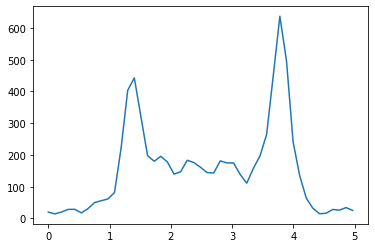

In [22]:
data = list(uploaded)

print("You have uploaded", len(data), "files.")

check=pd.read_csv(data[0])
check.head()
type(check)

plt.plot("X", "Y", data=check)






Now we can apply this to all CSV files uploaded to the directory in batch.


Number of Peaks: 2
[13 35]
NEs: [13 35]
Peak Dist.: 22
Nuc Mid:  24
NucStart:  18 NucEnd:  30
NucInt Point:  130.37
NucInt padded:  147


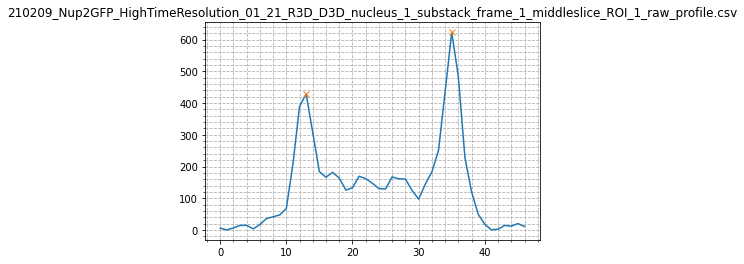

Number of Peaks: 3
[17 24 32]


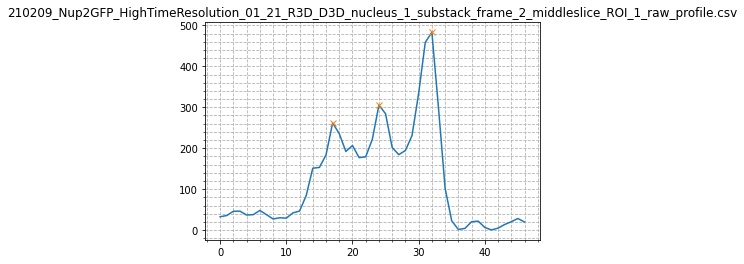

Choose NE1 Peak X position17
Choose NE2 Peak X position32
NEs: [17 32]
Peak Dist.: 15
Nuc Mid:  24
NucStart:  20 NucEnd:  28
NucInt Point:  305.467
NucInt padded:  220.129


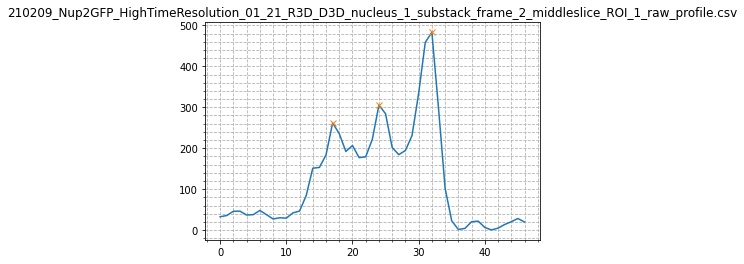

Number of Peaks: 2
[15 33]
NEs: [15 33]
Peak Dist.: 18
Nuc Mid:  24
NucStart:  19 NucEnd:  29
NucInt Point:  120.237
NucInt padded:  148


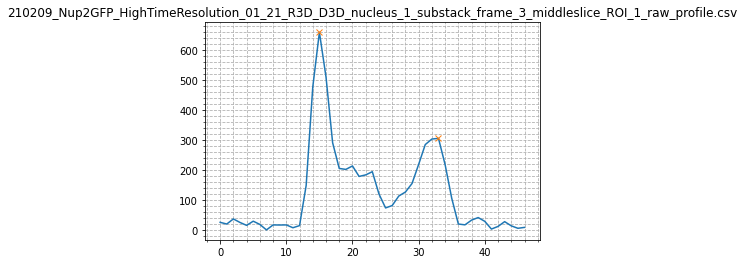

Number of Peaks: 2
[13 35]
NEs: [13 35]
Peak Dist.: 22
Nuc Mid:  24
NucStart:  18 NucEnd:  30
NucInt Point:  147.106
NucInt padded:  160


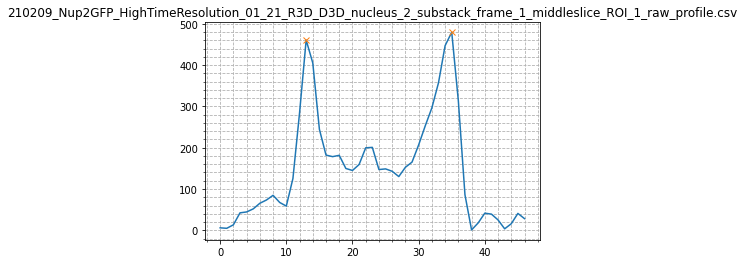

Number of Peaks: 1
[20]


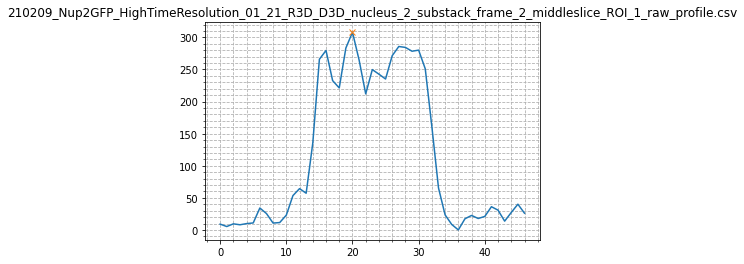

Choose NE1 Peak X position16
Choose NE2 Peak X position30
NEs: [16 30]
Peak Dist.: 14
Nuc Mid:  23
NucStart:  19 NucEnd:  26
NucInt Point:  249.819
NucInt padded:  256.54285714285714


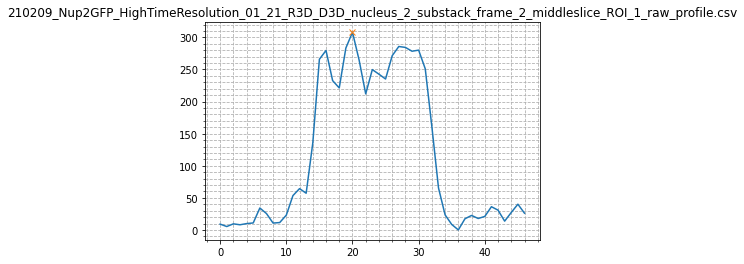

Number of Peaks: 2
[15 30]
NEs: [15 30]
Peak Dist.: 15
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  152.79
NucInt padded:  172


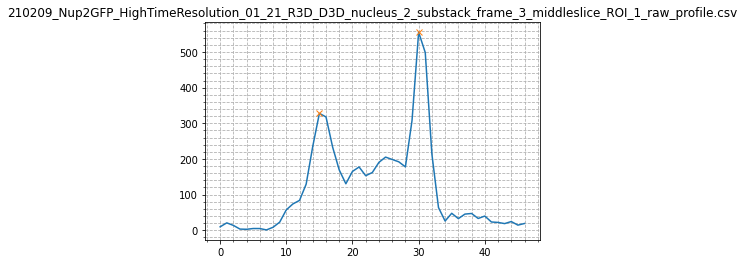

Number of Peaks: 2
[15 33]
NEs: [15 33]
Peak Dist.: 18
Nuc Mid:  24
NucStart:  19 NucEnd:  29
NucInt Point:  110.458
NucInt padded:  124


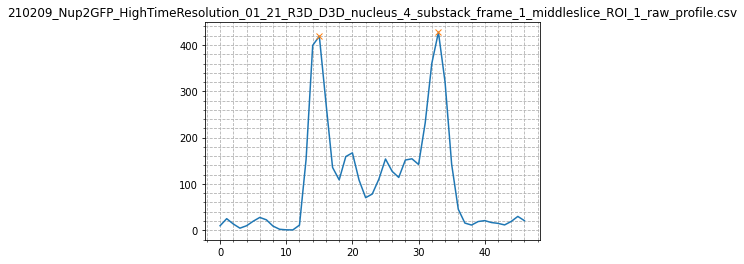

Number of Peaks: 1
[29]


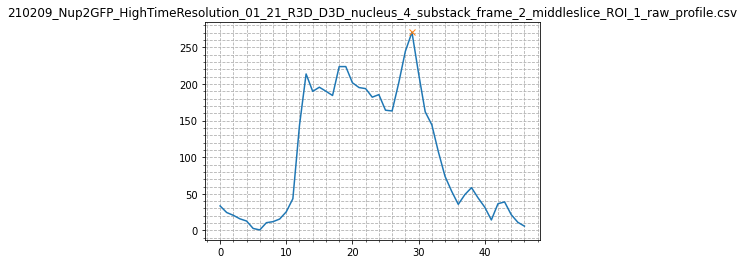

Choose NE1 Peak X position13
Choose NE2 Peak X position29
NEs: [13 29]
Peak Dist.: 16
Nuc Mid:  21
NucStart:  17 NucEnd:  25
NucInt Point:  195.101
NucInt padded:  198.69075


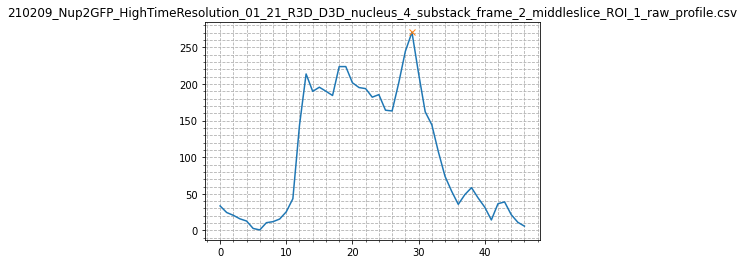

Number of Peaks: 2
[15 29]
NEs: [15 29]
Peak Dist.: 14
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  124.374
NucInt padded:  123


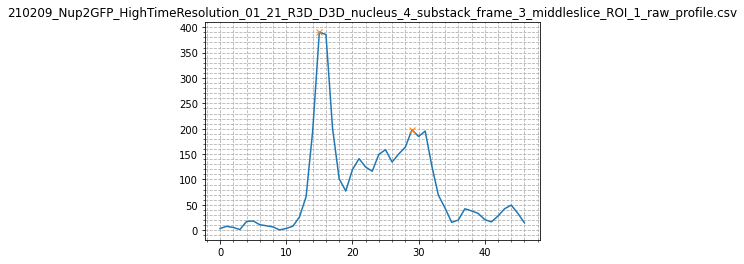

Number of Peaks: 3
[11 29 33]


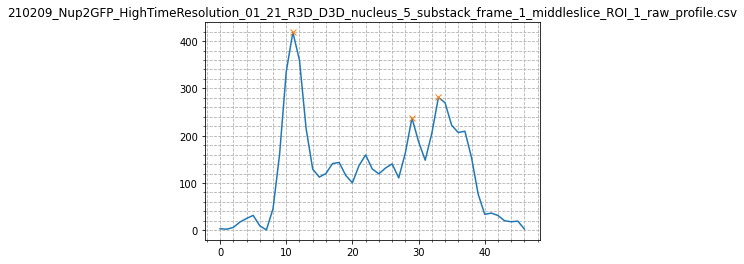

Choose NE1 Peak X position11
Choose NE2 Peak X position33
NEs: [11 33]
Peak Dist.: 22
Nuc Mid:  22
NucStart:  16 NucEnd:  27
NucInt Point:  159.425
NucInt padded:  130.79327272727275


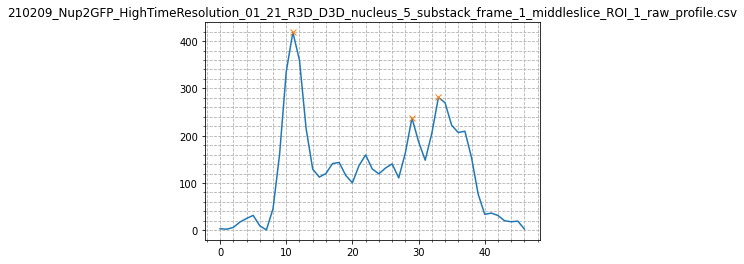

Number of Peaks: 2
[15 32]
NEs: [15 32]
Peak Dist.: 17
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  267.219
NucInt padded:  232


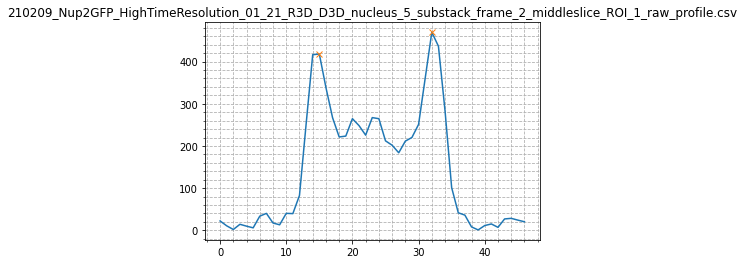

Number of Peaks: 2
[16 30]
NEs: [16 30]
Peak Dist.: 14
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  134.178
NucInt padded:  166


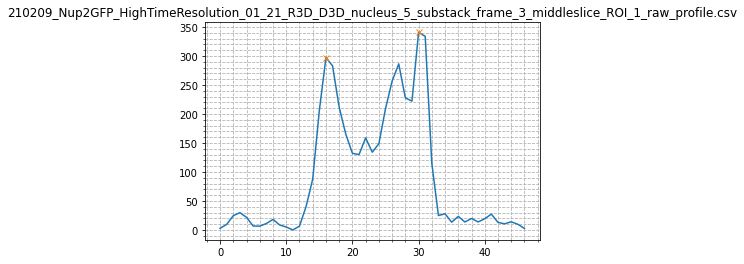

Number of Peaks: 2
[14 33]
NEs: [14 33]
Peak Dist.: 19
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  117.862
NucInt padded:  134


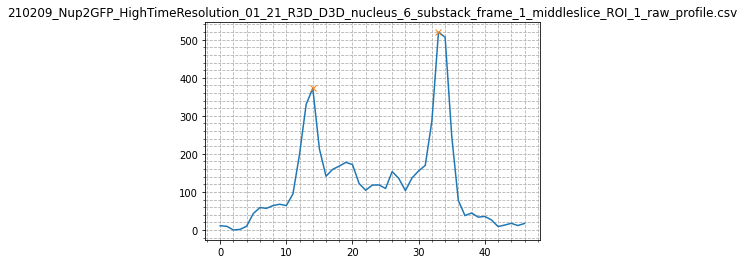

Number of Peaks: 2
[15 33]
NEs: [15 33]
Peak Dist.: 18
Nuc Mid:  24
NucStart:  19 NucEnd:  29
NucInt Point:  229.455
NucInt padded:  188


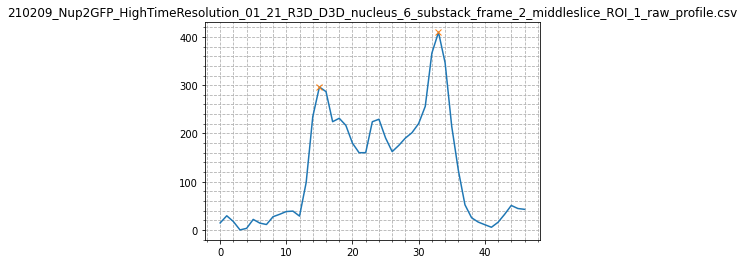

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  211.028
NucInt padded:  180


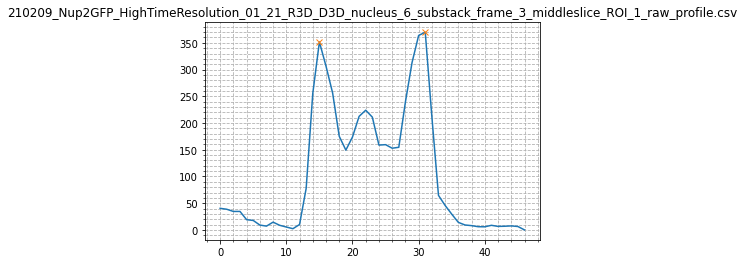

Number of Peaks: 2
[15 35]
NEs: [15 35]
Peak Dist.: 20
Nuc Mid:  25
NucStart:  20 NucEnd:  30
NucInt Point:  180.655
NucInt padded:  163


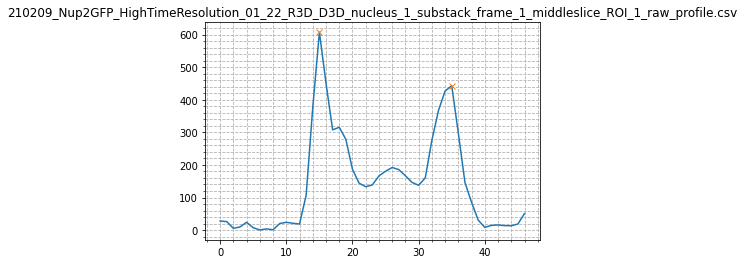

Number of Peaks: 2
[15 30]
NEs: [15 30]
Peak Dist.: 15
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  287.93
NucInt padded:  277


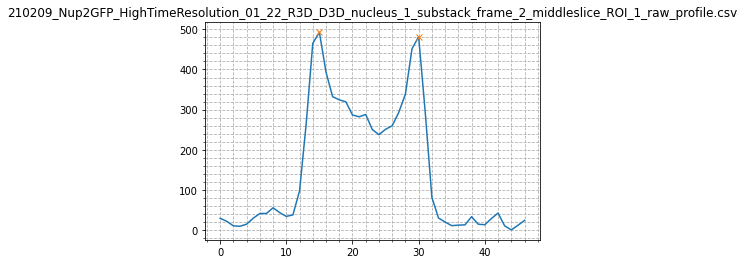

Number of Peaks: 2
[13 31]
NEs: [13 31]
Peak Dist.: 18
Nuc Mid:  22
NucStart:  17 NucEnd:  27
NucInt Point:  194.15
NucInt padded:  186


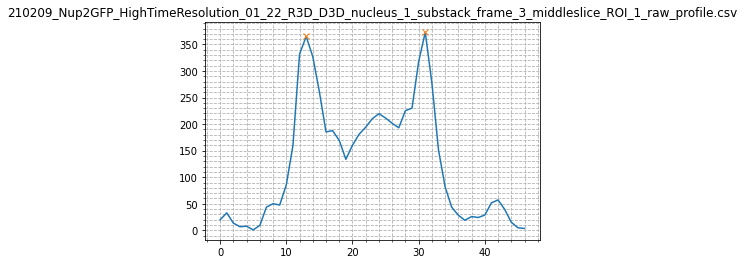

Number of Peaks: 2
[12 34]
NEs: [12 34]
Peak Dist.: 22
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  141.037
NucInt padded:  146


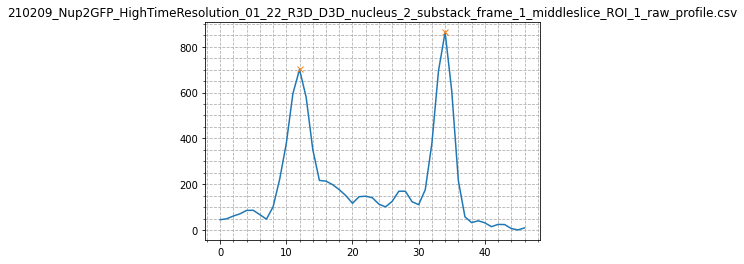

Number of Peaks: 2
[15 32]
NEs: [15 32]
Peak Dist.: 17
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  217.525
NucInt padded:  238


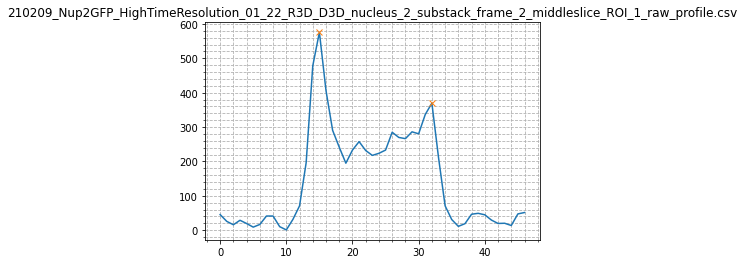

Number of Peaks: 2
[16 33]
NEs: [16 33]
Peak Dist.: 17
Nuc Mid:  24
NucStart:  20 NucEnd:  29
NucInt Point:  126.39099999999999
NucInt padded:  120


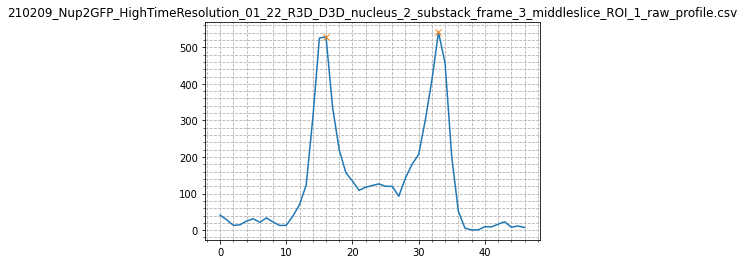

Number of Peaks: 2
[11 33]
NEs: [11 33]
Peak Dist.: 22
Nuc Mid:  22
NucStart:  16 NucEnd:  28
NucInt Point:  129.23
NucInt padded:  106


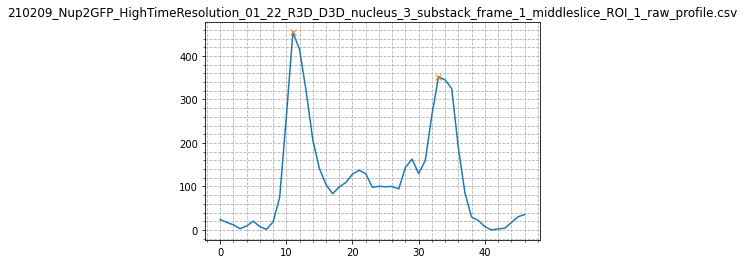

Number of Peaks: 1
[32]


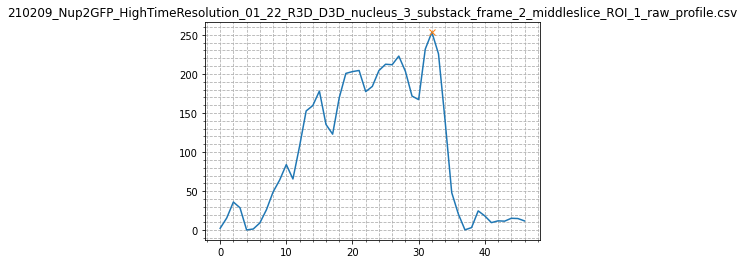

Choose NE1 Peak X position14
Choose NE2 Peak X position32
NEs: [14 32]
Peak Dist.: 18
Nuc Mid:  23
NucStart:  18 NucEnd:  27
NucInt Point:  184.01
NucInt padded:  196.37355555555555


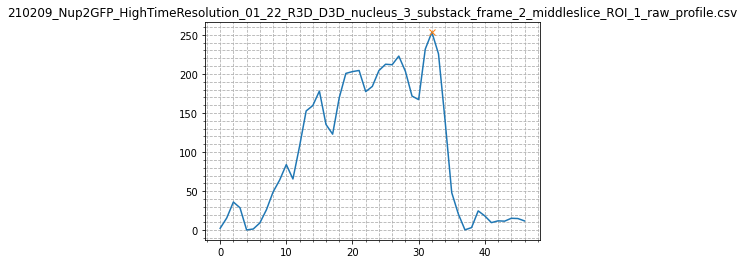

Number of Peaks: 2
[16 31]
NEs: [16 31]
Peak Dist.: 15
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  177.64
NucInt padded:  183


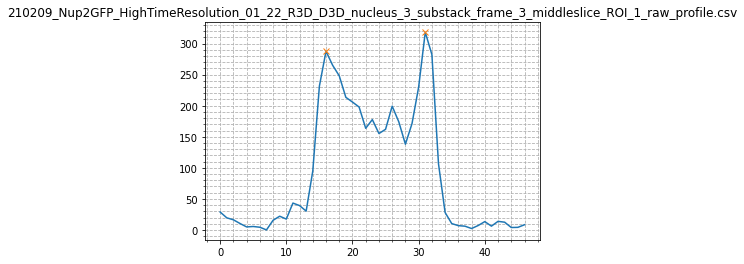

Number of Peaks: 3
[11 26 35]


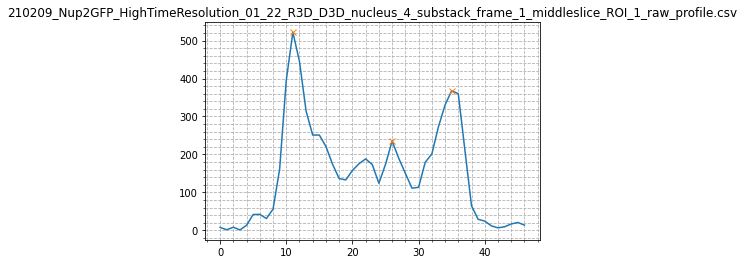

Choose NE1 Peak X position11
Choose NE2 Peak X position35
NEs: [11 35]
Peak Dist.: 24
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  173.282
NucInt padded:  167.60716666666664


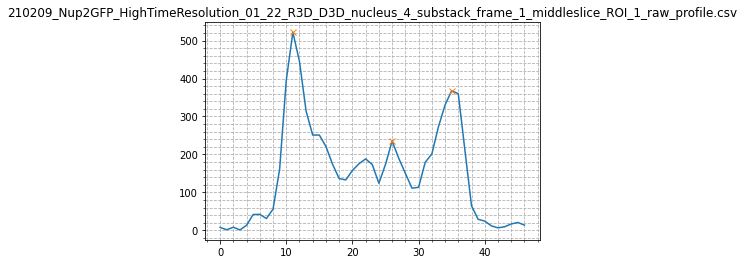

Number of Peaks: 1
[15]


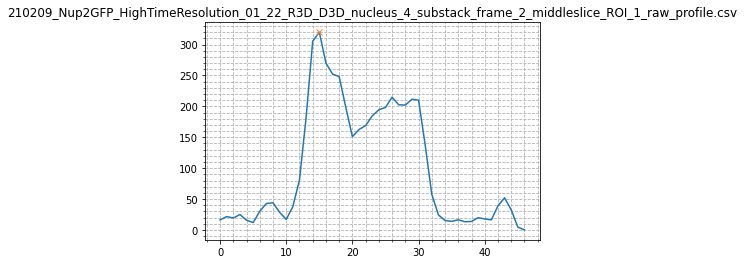

Choose NE1 Peak X position15
Choose NE2 Peak X position30
NEs: [15 30]
Peak Dist.: 15
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  168.913
NucInt padded:  188.29500000000002


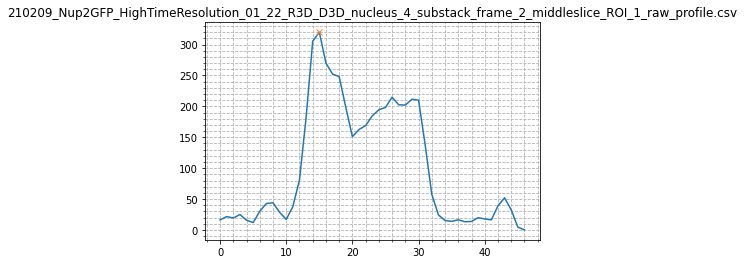

Number of Peaks: 2
[14 30]
NEs: [14 30]
Peak Dist.: 16
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  155.837
NucInt padded:  154


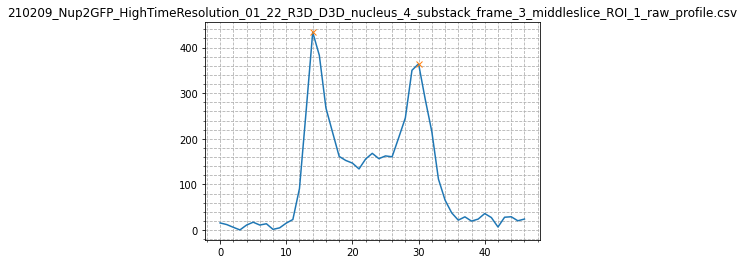

Number of Peaks: 2
[13 35]
NEs: [13 35]
Peak Dist.: 22
Nuc Mid:  24
NucStart:  18 NucEnd:  30
NucInt Point:  165.388
NucInt padded:  195


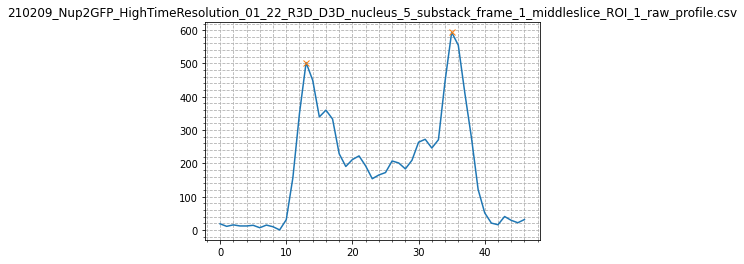

Number of Peaks: 1
[17]


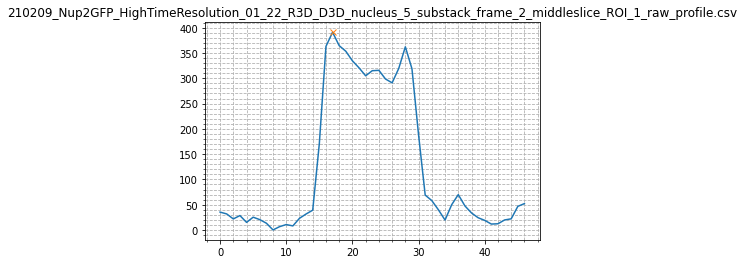

Choose NE1 Peak X position17
Choose NE2 Peak X position28
NEs: [17 28]
Peak Dist.: 11
Nuc Mid:  22
NucStart:  19 NucEnd:  25
NucInt Point:  304.939
NucInt padded:  324.10633333333334


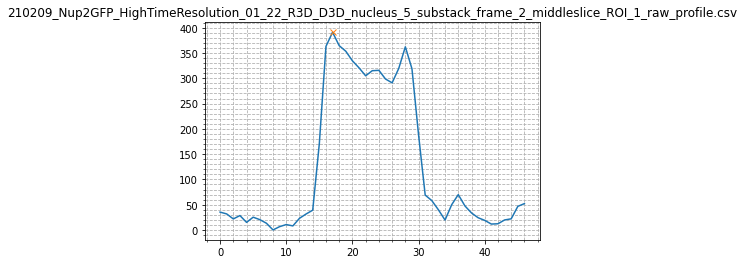

Number of Peaks: 2
[16 32]
NEs: [16 32]
Peak Dist.: 16
Nuc Mid:  24
NucStart:  20 NucEnd:  28
NucInt Point:  169.173
NucInt padded:  174


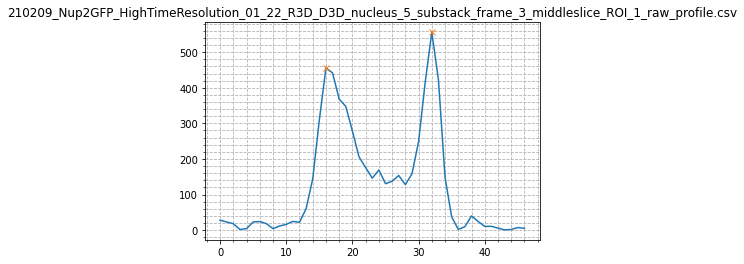

Number of Peaks: 2
[12 33]
NEs: [12 33]
Peak Dist.: 21
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  168.432
NucInt padded:  157


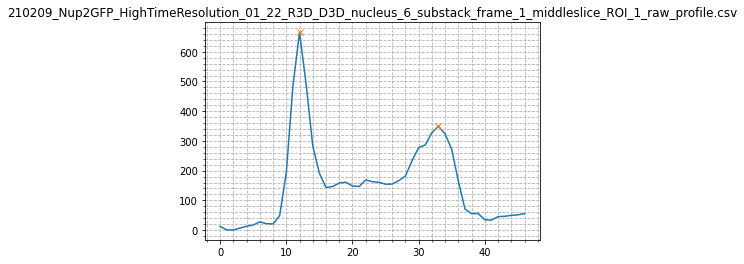

Number of Peaks: 1
[15]


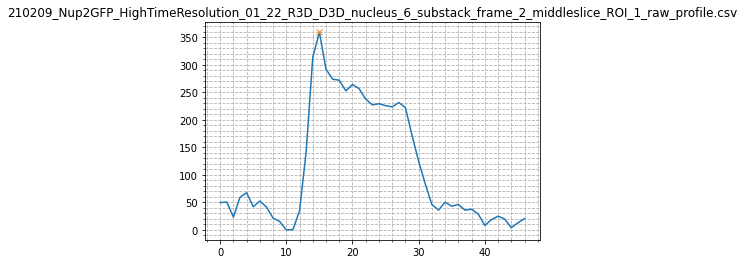

Choose NE1 Peak X position15
Choose NE2 Peak X position28
NEs: [15 28]
Peak Dist.: 13
Nuc Mid:  21
NucStart:  18 NucEnd:  24
NucInt Point:  256.773
NucInt padded:  251.89049999999995


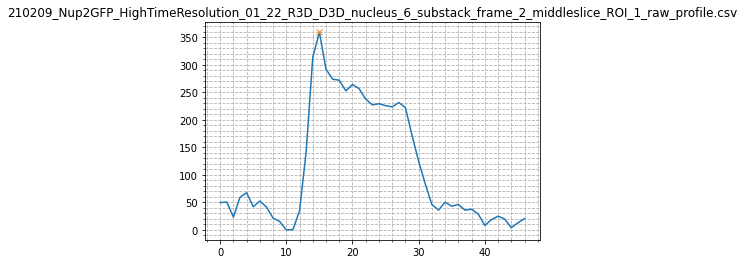

Number of Peaks: 2
[14 31]
NEs: [14 31]
Peak Dist.: 17
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  167.776
NucInt padded:  160


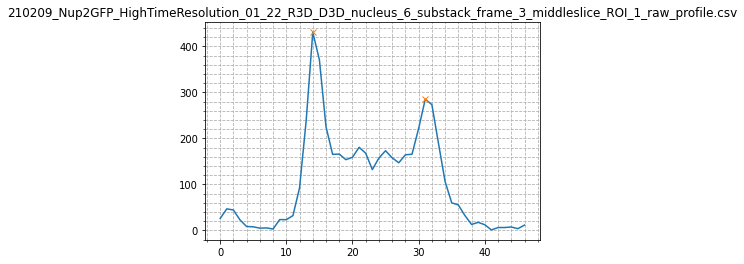

Number of Peaks: 2
[15 34]
NEs: [15 34]
Peak Dist.: 19
Nuc Mid:  24
NucStart:  19 NucEnd:  30
NucInt Point:  140.64
NucInt padded:  176


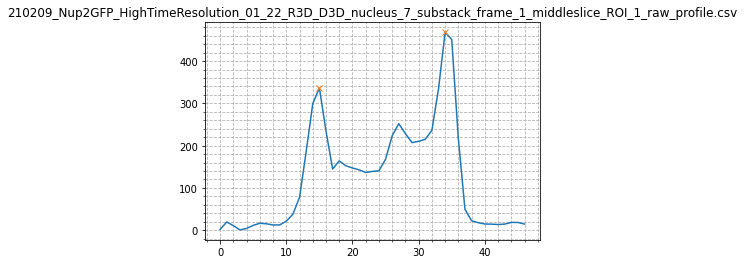

Number of Peaks: 3
[17 25 29]


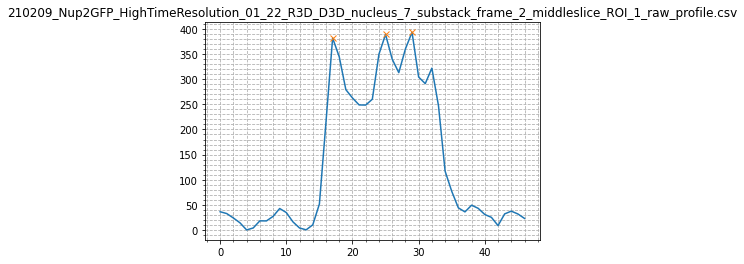

Choose NE1 Peak X position17
Choose NE2 Peak X position27
NEs: [17 27]
Peak Dist.: 10
Nuc Mid:  22
NucStart:  19 NucEnd:  24
NucInt Point:  248.557
NucInt padded:  259.9136


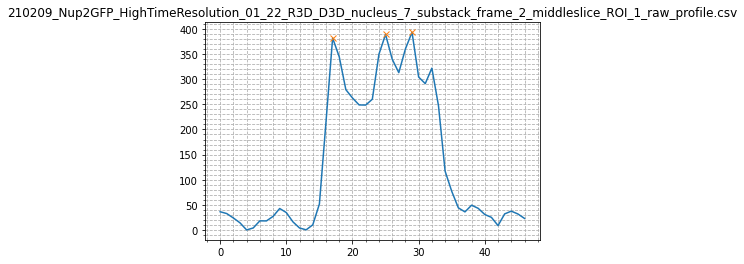

Number of Peaks: 2
[17 32]
NEs: [17 32]
Peak Dist.: 15
Nuc Mid:  24
NucStart:  20 NucEnd:  29
NucInt Point:  136.677
NucInt padded:  179


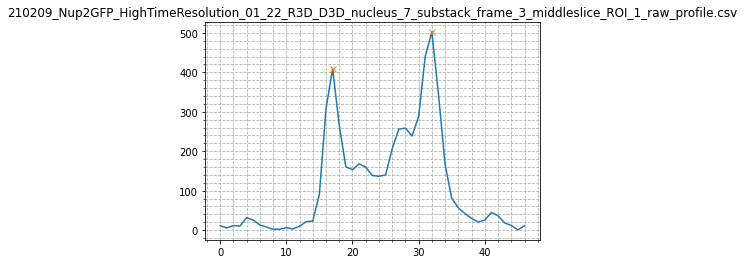

Number of Peaks: 2
[15 33]
NEs: [15 33]
Peak Dist.: 18
Nuc Mid:  24
NucStart:  19 NucEnd:  29
NucInt Point:  140.801
NucInt padded:  124


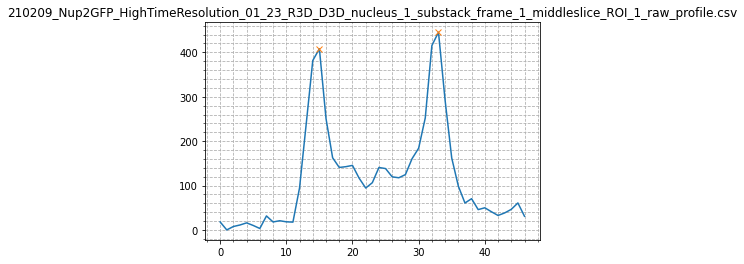

Number of Peaks: 2
[16 30]
NEs: [16 30]
Peak Dist.: 14
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  175.568
NucInt padded:  174


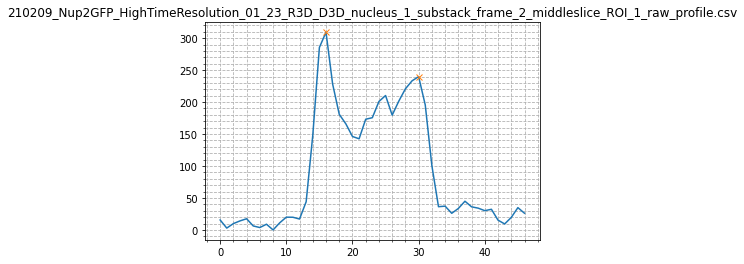

Number of Peaks: 2
[13 31]
NEs: [13 31]
Peak Dist.: 18
Nuc Mid:  22
NucStart:  17 NucEnd:  27
NucInt Point:  93.49
NucInt padded:  138


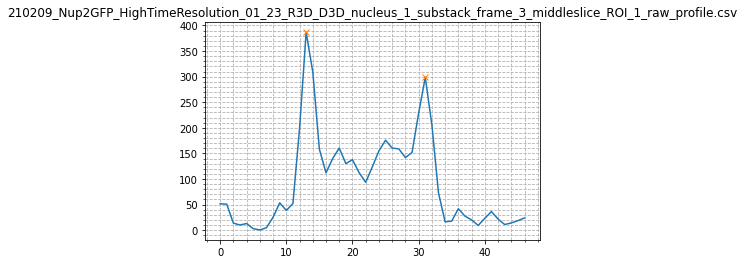

Number of Peaks: 2
[12 34]
NEs: [12 34]
Peak Dist.: 22
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  137.386
NucInt padded:  138


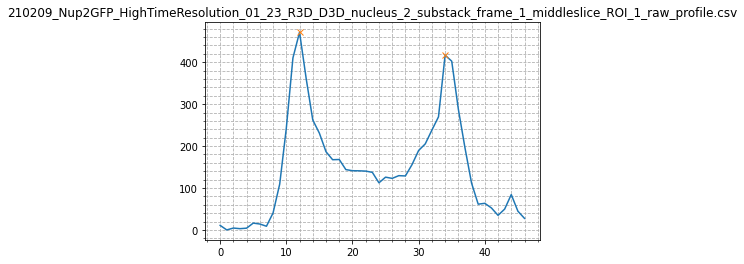

Number of Peaks: 1
[26]


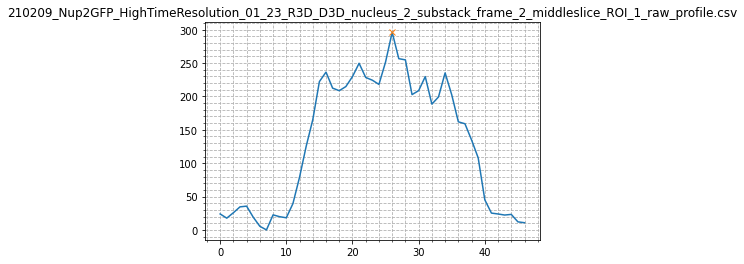

Choose NE1 Peak X position16
Choose NE2 Peak X position34
NEs: [16 34]
Peak Dist.: 18
Nuc Mid:  25
NucStart:  20 NucEnd:  29
NucInt Point:  251.58300000000003
NucInt padded:  245.50022222222222


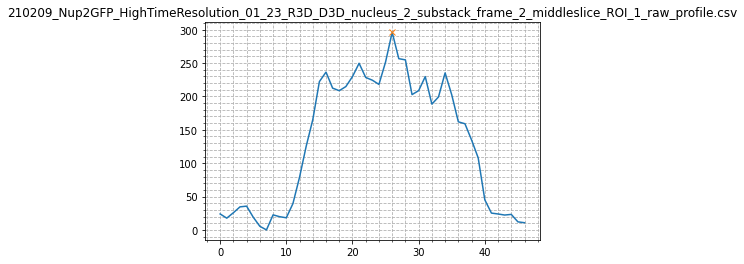

Number of Peaks: 2
[14 33]
NEs: [14 33]
Peak Dist.: 19
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  79.324
NucInt padded:  105


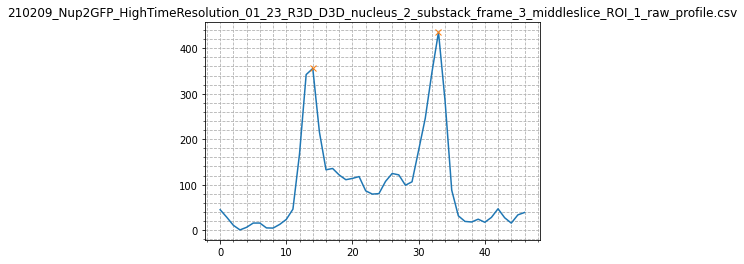

Number of Peaks: 2
[13 35]
NEs: [13 35]
Peak Dist.: 22
Nuc Mid:  24
NucStart:  18 NucEnd:  30
NucInt Point:  99.424
NucInt padded:  117


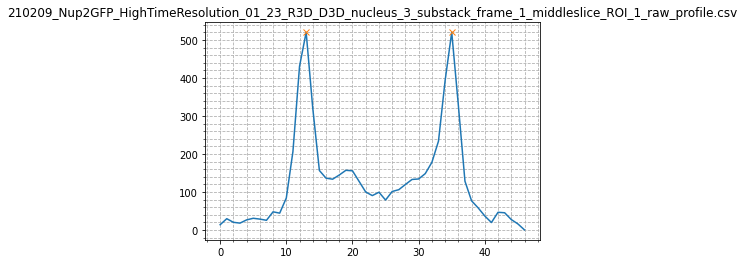

Number of Peaks: 2
[15 33]
NEs: [15 33]
Peak Dist.: 18
Nuc Mid:  24
NucStart:  19 NucEnd:  29
NucInt Point:  208.174
NucInt padded:  213


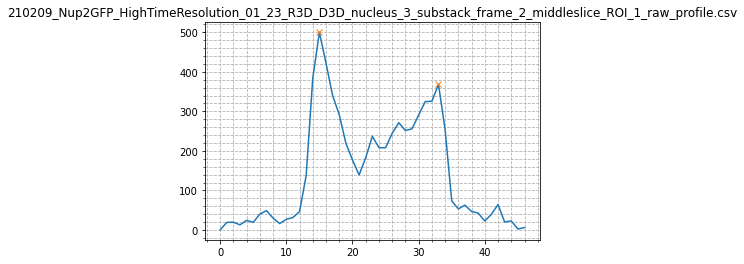

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  160.457
NucInt padded:  168


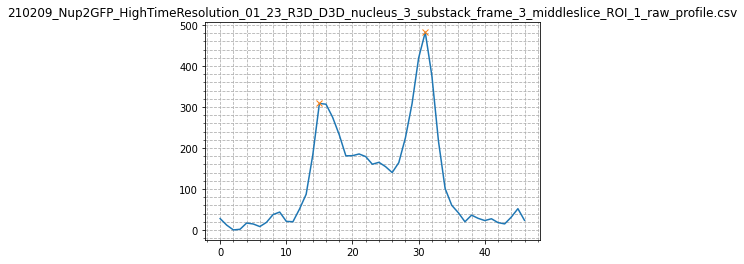

Number of Peaks: 2
[12 34]
NEs: [12 34]
Peak Dist.: 22
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  150.219
NucInt padded:  145


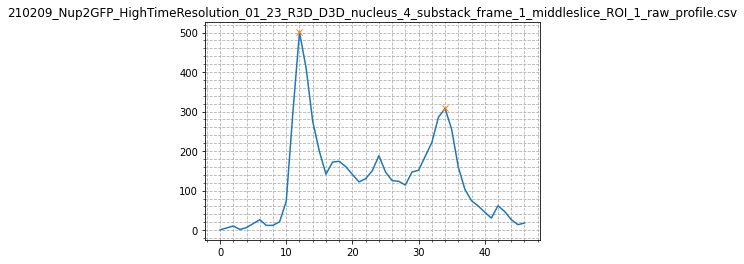

Number of Peaks: 2
[14 28]
NEs: [14 28]
Peak Dist.: 14
Nuc Mid:  21
NucStart:  17 NucEnd:  25
NucInt Point:  200.807
NucInt padded:  184


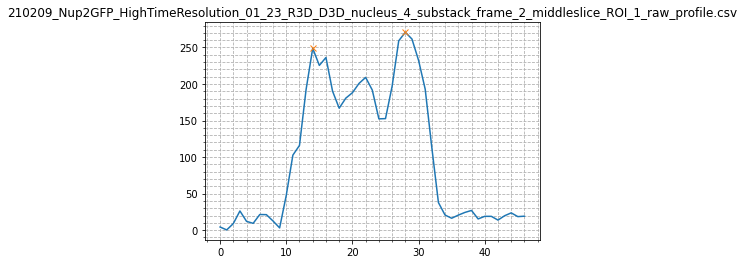

Number of Peaks: 2
[15 30]
NEs: [15 30]
Peak Dist.: 15
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  97.012
NucInt padded:  113


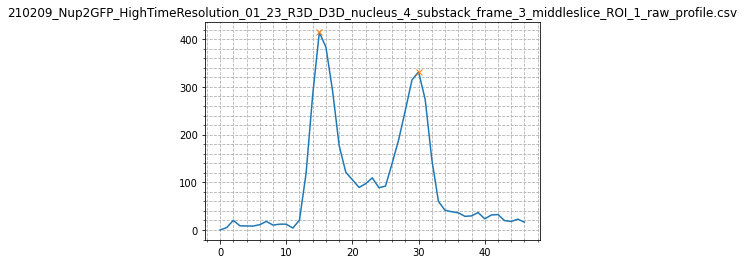

Number of Peaks: 2
[13 33]
NEs: [13 33]
Peak Dist.: 20
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  102.094
NucInt padded:  129


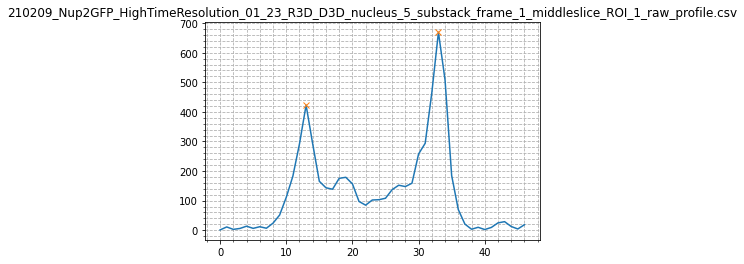

Number of Peaks: 2
[16 30]
NEs: [16 30]
Peak Dist.: 14
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  225.938
NucInt padded:  228


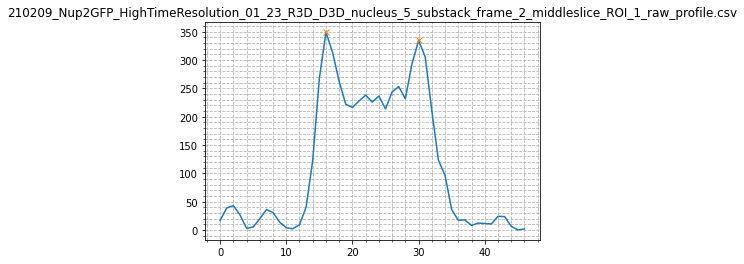

Number of Peaks: 2
[14 31]
NEs: [14 31]
Peak Dist.: 17
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  165.97
NucInt padded:  177


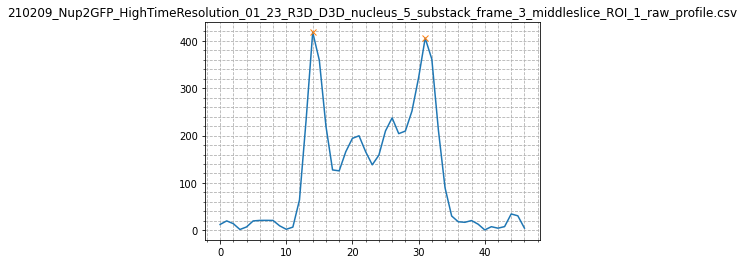

Number of Peaks: 2
[12 33]
NEs: [12 33]
Peak Dist.: 21
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  96.081
NucInt padded:  96


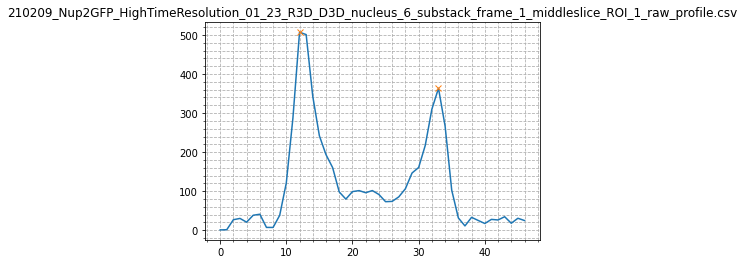

Number of Peaks: 2
[15 28]
NEs: [15 28]
Peak Dist.: 13
Nuc Mid:  21
NucStart:  18 NucEnd:  25
NucInt Point:  178.986
NucInt padded:  175


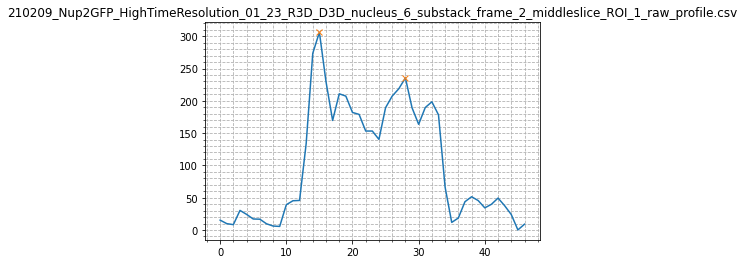

Number of Peaks: 2
[13 29]
NEs: [13 29]
Peak Dist.: 16
Nuc Mid:  21
NucStart:  17 NucEnd:  25
NucInt Point:  92.777
NucInt padded:  109


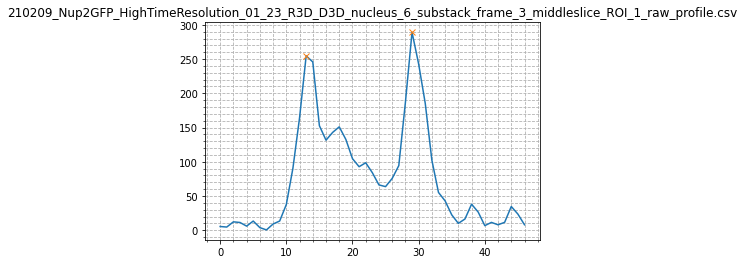

Number of Peaks: 2
[11 33]
NEs: [11 33]
Peak Dist.: 22
Nuc Mid:  22
NucStart:  16 NucEnd:  28
NucInt Point:  136.138
NucInt padded:  167


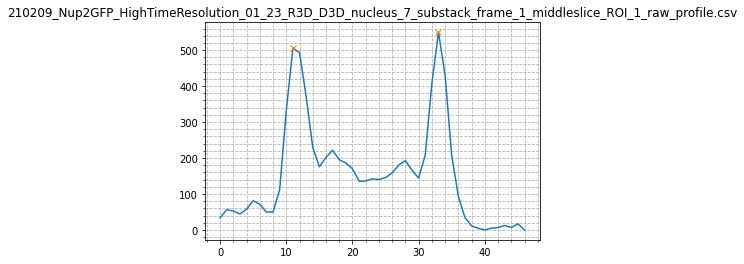

Number of Peaks: 2
[16 32]
NEs: [16 32]
Peak Dist.: 16
Nuc Mid:  24
NucStart:  20 NucEnd:  28
NucInt Point:  296.289
NucInt padded:  269


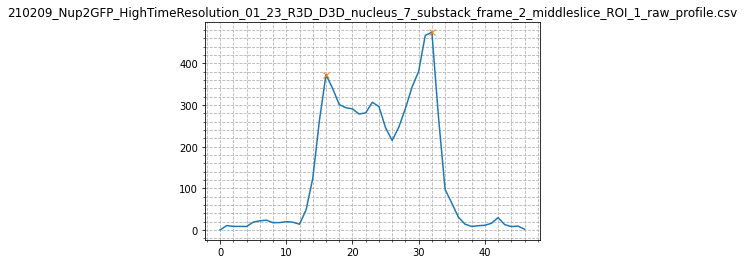

Number of Peaks: 2
[13 32]
NEs: [13 32]
Peak Dist.: 19
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  151.308
NucInt padded:  179


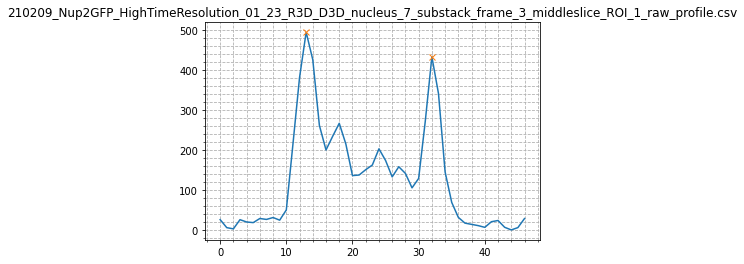

Number of Peaks: 2
[13 34]
NEs: [13 34]
Peak Dist.: 21
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  180.041
NucInt padded:  152


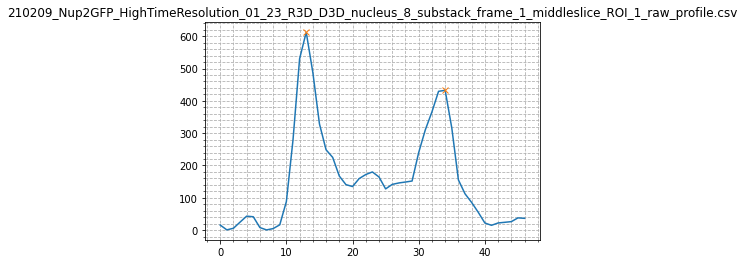

Number of Peaks: 2
[14 30]
NEs: [14 30]
Peak Dist.: 16
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  261.592
NucInt padded:  262


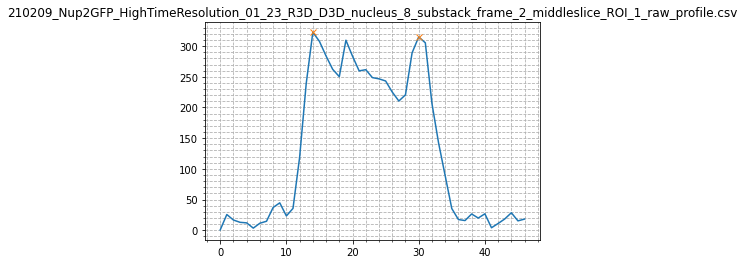

Number of Peaks: 3
[13 24 32]


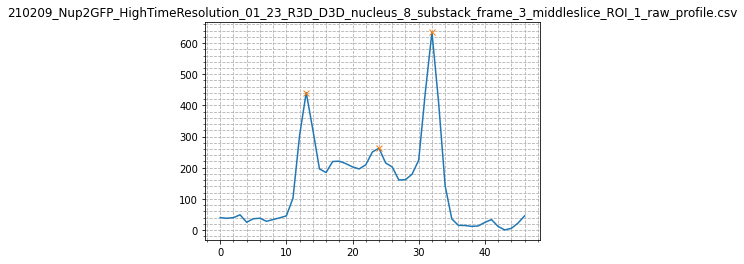

Choose NE1 Peak X position13
Choose NE2 Peak X position32
NEs: [13 32]
Peak Dist.: 19
Nuc Mid:  22
NucStart:  17 NucEnd:  27
NucInt Point:  209.391
NucInt padded:  219.24169999999998


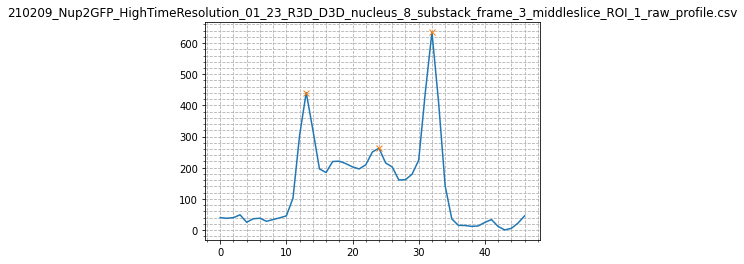

Number of Peaks: 2
[13 32]
NEs: [13 32]
Peak Dist.: 19
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  136.303
NucInt padded:  170


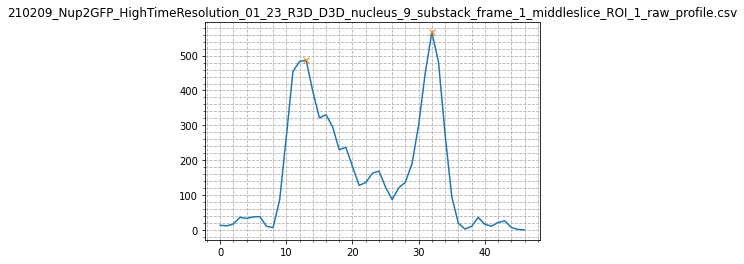

Number of Peaks: 1
[18]


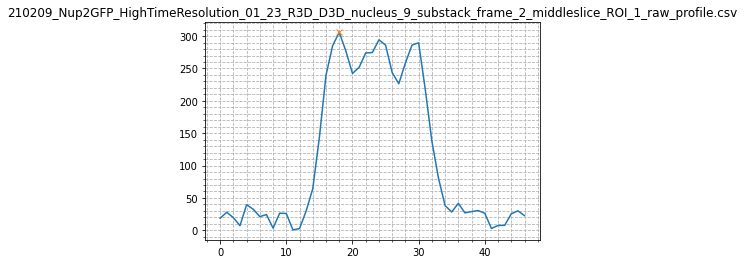

Choose NE1 Peak X position18
Choose NE2 Peak X position30
NEs: [18 30]
Peak Dist.: 12
Nuc Mid:  24
NucStart:  21 NucEnd:  27
NucInt Point:  294.192
NucInt padded:  270.6975


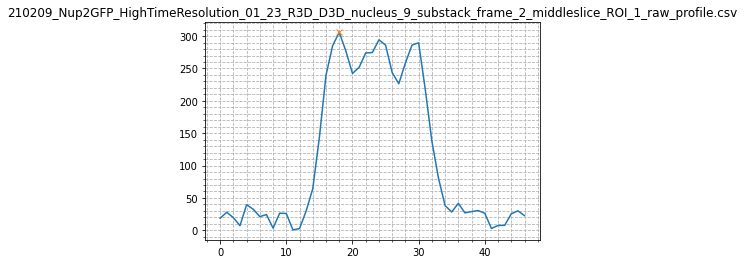

Number of Peaks: 2
[18 32]
NEs: [18 32]
Peak Dist.: 14
Nuc Mid:  25
NucStart:  21 NucEnd:  29
NucInt Point:  229.343
NucInt padded:  185


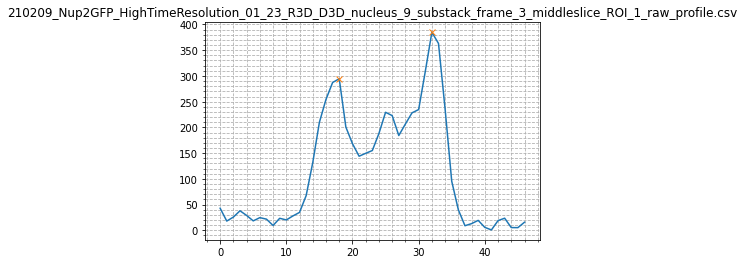

Number of Peaks: 2
[14 33]
NEs: [14 33]
Peak Dist.: 19
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  126.42500000000001
NucInt padded:  145


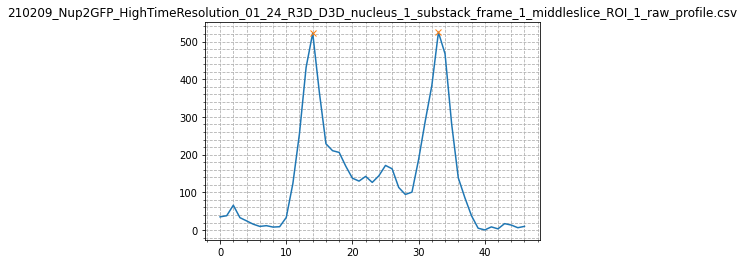

Number of Peaks: 1
[16]


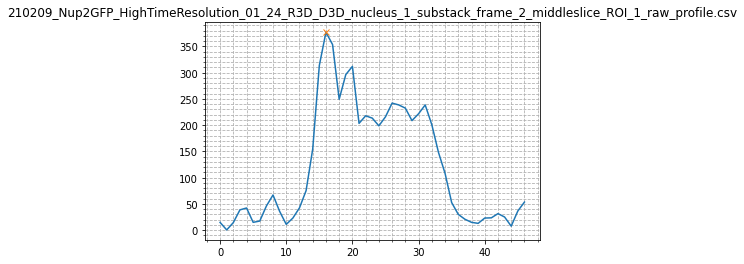

Choose NE1 Peak X position16
Choose NE2 Peak X position31
NEs: [16 31]
Peak Dist.: 15
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  213.533
NucInt padded:  237.57012500000002


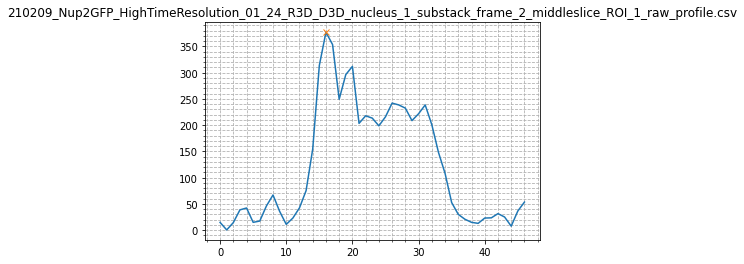

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  114.378
NucInt padded:  141


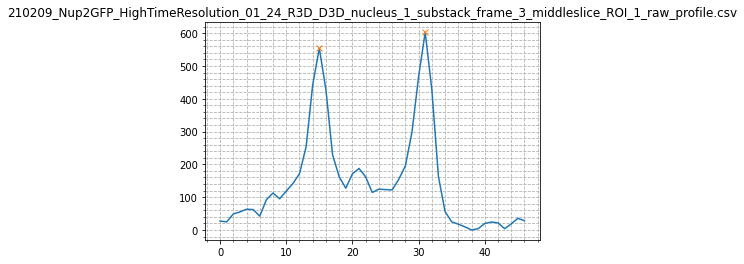

Number of Peaks: 2
[11 37]
NEs: [11 37]
Peak Dist.: 26
Nuc Mid:  24
NucStart:  17 NucEnd:  31
NucInt Point:  126.43299999999999
NucInt padded:  121


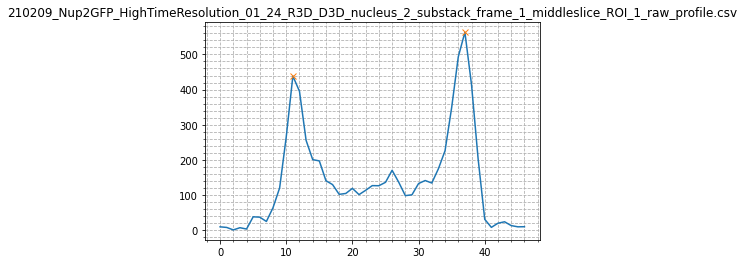

Number of Peaks: 2
[16 33]
NEs: [16 33]
Peak Dist.: 17
Nuc Mid:  24
NucStart:  20 NucEnd:  29
NucInt Point:  264.318
NucInt padded:  220


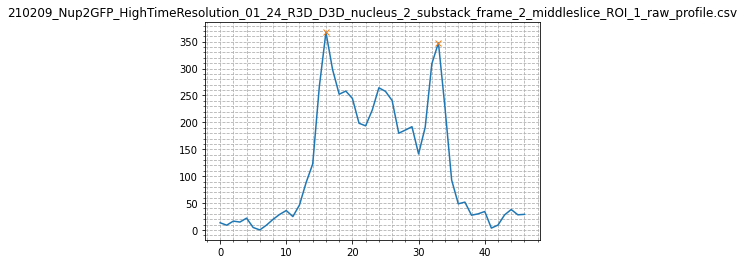

Number of Peaks: 2
[14 35]
NEs: [14 35]
Peak Dist.: 21
Nuc Mid:  24
NucStart:  19 NucEnd:  30
NucInt Point:  145.522
NucInt padded:  159


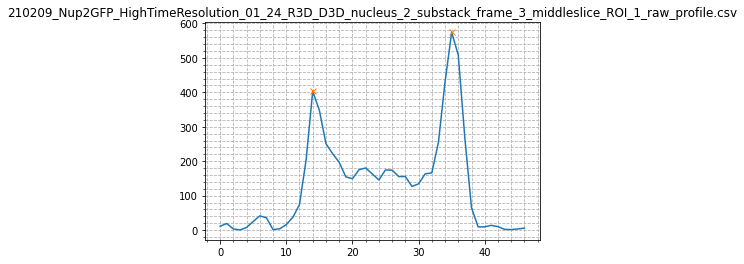

Number of Peaks: 2
[17 30]
NEs: [17 30]
Peak Dist.: 13
Nuc Mid:  23
NucStart:  20 NucEnd:  27
NucInt Point:  136.327
NucInt padded:  136


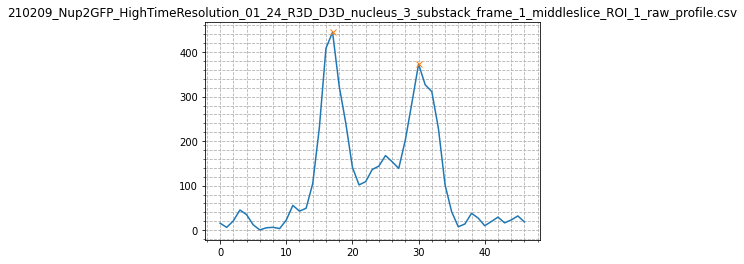

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  250.837
NucInt padded:  236


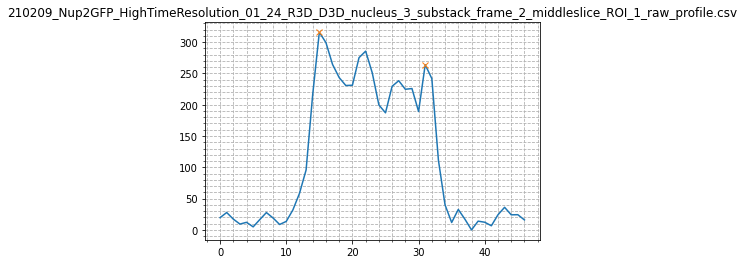

Number of Peaks: 2
[17 28]
NEs: [17 28]
Peak Dist.: 11
Nuc Mid:  22
NucStart:  19 NucEnd:  26
NucInt Point:  121.951
NucInt padded:  148


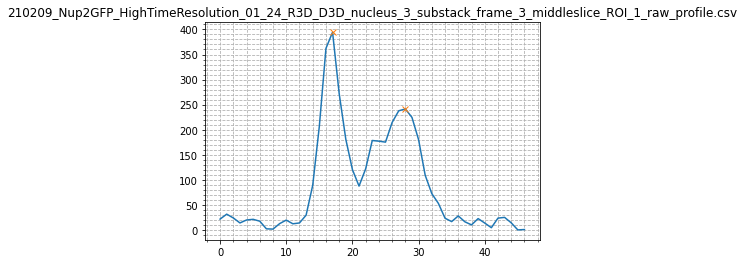

Number of Peaks: 3
[10 23 35]


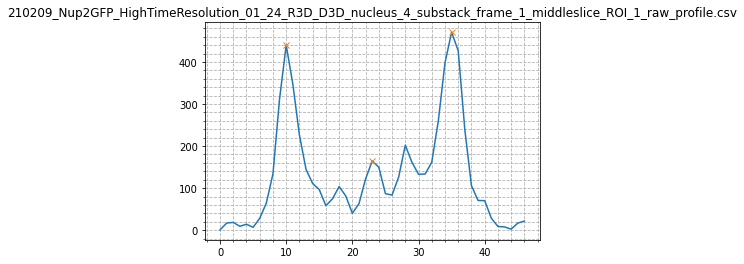

Choose NE1 Peak X position10
Choose NE2 Peak X position35
NEs: [10 35]
Peak Dist.: 25
Nuc Mid:  22
NucStart:  16 NucEnd:  28
NucInt Point:  121.93100000000001
NucInt padded:  96.21775000000001


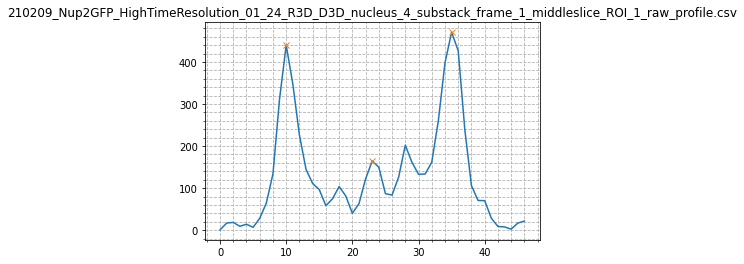

Number of Peaks: 3
[12 23 36]


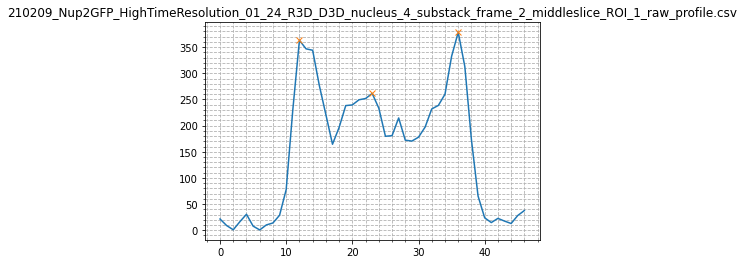

Choose NE1 Peak X position12
Choose NE2 Peak X position26
NEs: [12 26]
Peak Dist.: 14
Nuc Mid:  19
NucStart:  15 NucEnd:  22
NucInt Point:  238.254
NucInt padded:  226.60814285714284


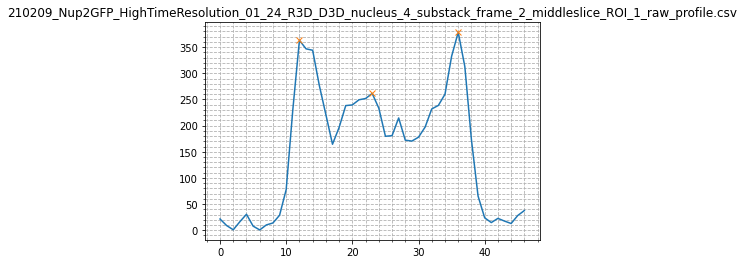

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  121.68700000000001
NucInt padded:  149


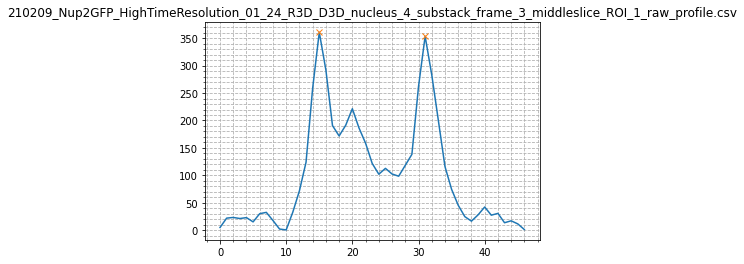

Number of Peaks: 2
[14 35]
NEs: [14 35]
Peak Dist.: 21
Nuc Mid:  24
NucStart:  19 NucEnd:  30
NucInt Point:  93.17
NucInt padded:  117


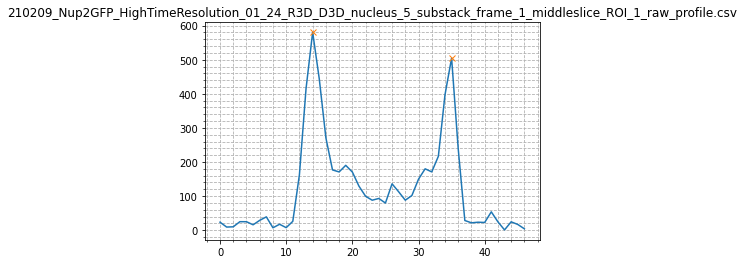

Number of Peaks: 1
[15]


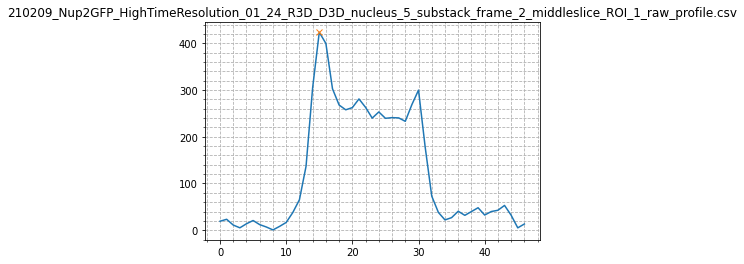

Choose NE1 Peak X position15
Choose NE2 Peak X position30
NEs: [15 30]
Peak Dist.: 15
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  262.997
NucInt padded:  258.173625


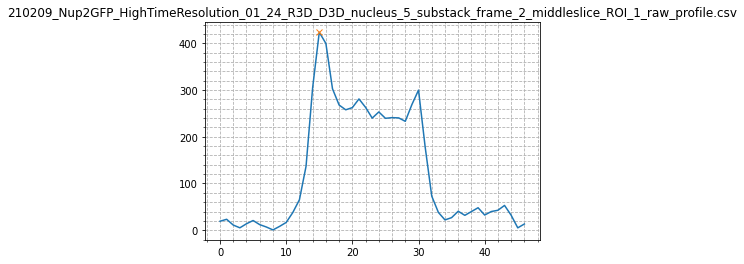

Number of Peaks: 2
[17 28]
NEs: [17 28]
Peak Dist.: 11
Nuc Mid:  22
NucStart:  19 NucEnd:  26
NucInt Point:  110.645
NucInt padded:  140


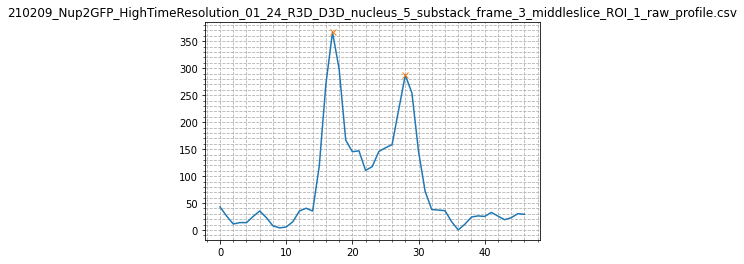

Number of Peaks: 2
[10 34]
NEs: [10 34]
Peak Dist.: 24
Nuc Mid:  22
NucStart:  16 NucEnd:  28
NucInt Point:  104.785
NucInt padded:  114


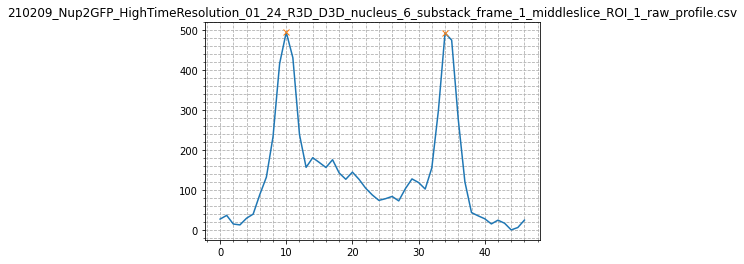

Number of Peaks: 2
[21 30]
NEs: [21 30]
Peak Dist.: 9
Nuc Mid:  25
NucStart:  23 NucEnd:  28
NucInt Point:  234.812
NucInt padded:  230


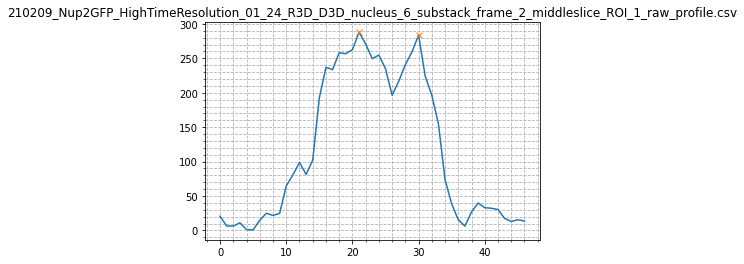

Number of Peaks: 2
[15 34]
NEs: [15 34]
Peak Dist.: 19
Nuc Mid:  24
NucStart:  19 NucEnd:  30
NucInt Point:  142.471
NucInt padded:  148


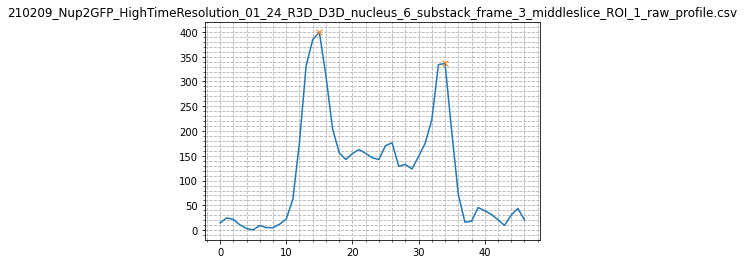

Number of Peaks: 2
[14 33]
NEs: [14 33]
Peak Dist.: 19
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  119.49600000000001
NucInt padded:  151


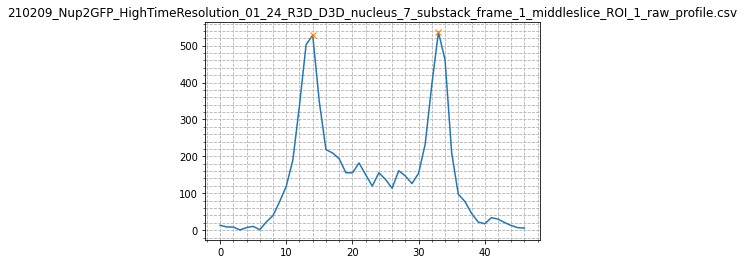

Number of Peaks: 2
[13 31]
NEs: [13 31]
Peak Dist.: 18
Nuc Mid:  22
NucStart:  17 NucEnd:  27
NucInt Point:  240.126
NucInt padded:  215


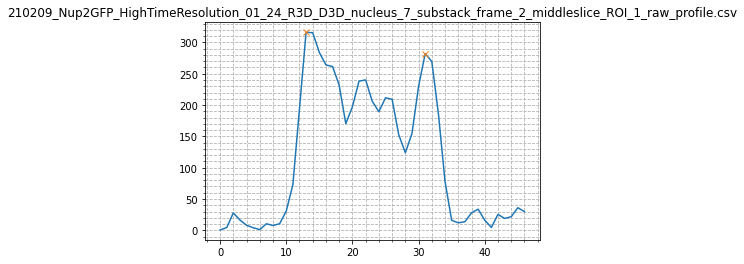

Number of Peaks: 2
[18 34]
NEs: [18 34]
Peak Dist.: 16
Nuc Mid:  26
NucStart:  22 NucEnd:  30
NucInt Point:  164.997
NucInt padded:  151


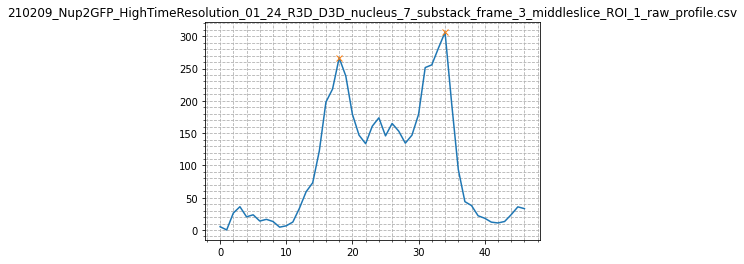

Number of Peaks: 2
[13 34]
NEs: [13 34]
Peak Dist.: 21
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  120.635
NucInt padded:  173


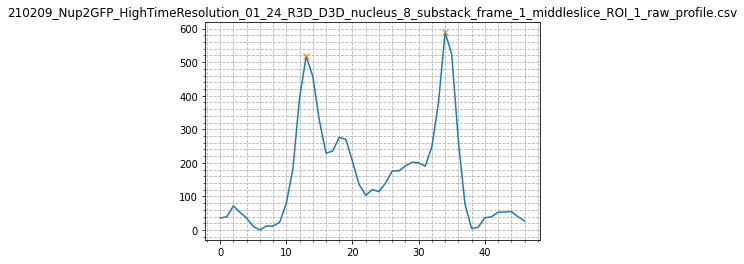

Number of Peaks: 1
[29]


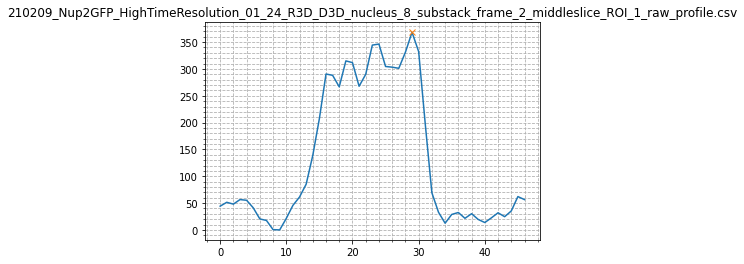

Choose NE1 Peak X position16
Choose NE2 Peak X position29
NEs: [16 29]
Peak Dist.: 13
Nuc Mid:  22
NucStart:  19 NucEnd:  25
NucInt Point:  289.919
NucInt padded:  312.5316666666666


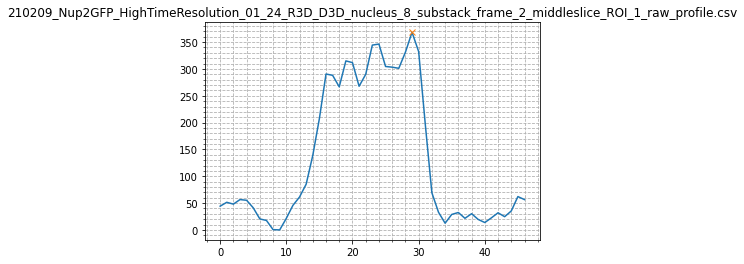

Number of Peaks: 2
[16 30]
NEs: [16 30]
Peak Dist.: 14
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  156.836
NucInt padded:  178


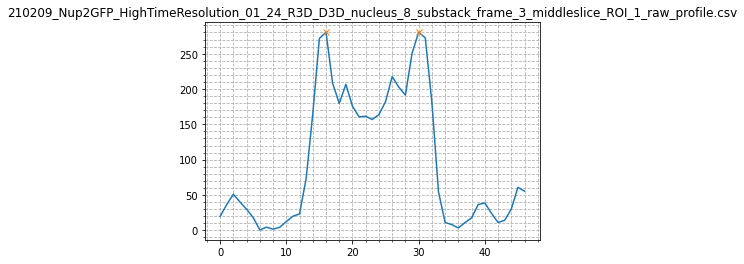

Number of Peaks: 2
[14 34]
NEs: [14 34]
Peak Dist.: 20
Nuc Mid:  24
NucStart:  19 NucEnd:  29
NucInt Point:  134.344
NucInt padded:  158


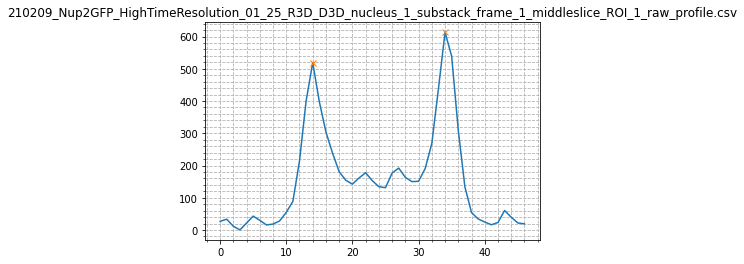

Number of Peaks: 2
[15 29]
NEs: [15 29]
Peak Dist.: 14
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  273.132
NucInt padded:  280


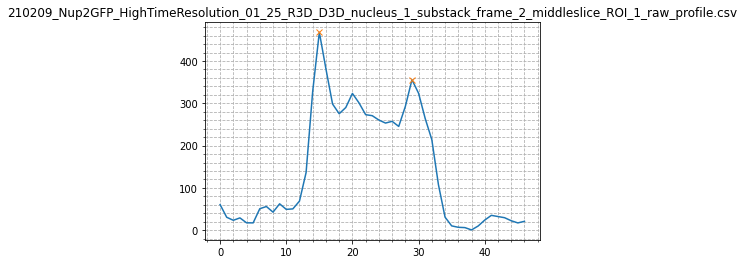

Number of Peaks: 2
[17 29]
NEs: [17 29]
Peak Dist.: 12
Nuc Mid:  23
NucStart:  20 NucEnd:  26
NucInt Point:  189.378
NucInt padded:  223


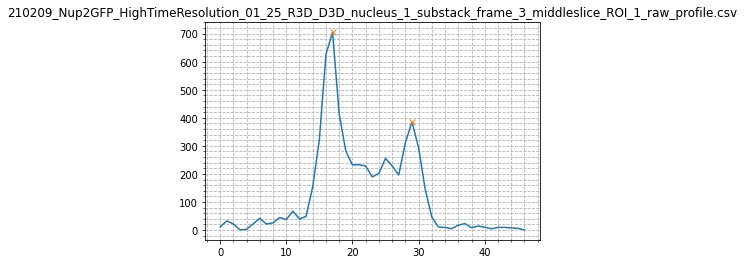

Number of Peaks: 2
[14 33]
NEs: [14 33]
Peak Dist.: 19
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  118.368
NucInt padded:  133


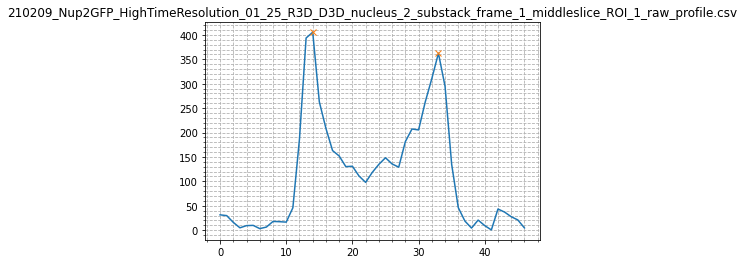

Number of Peaks: 2
[11 32]
NEs: [11 32]
Peak Dist.: 21
Nuc Mid:  21
NucStart:  16 NucEnd:  27
NucInt Point:  142.517
NucInt padded:  156


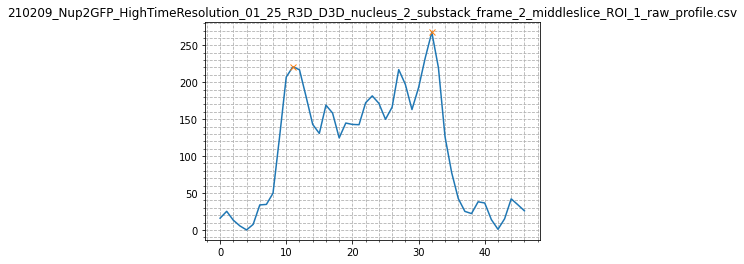

Number of Peaks: 2
[14 30]
NEs: [14 30]
Peak Dist.: 16
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  176.464
NucInt padded:  164


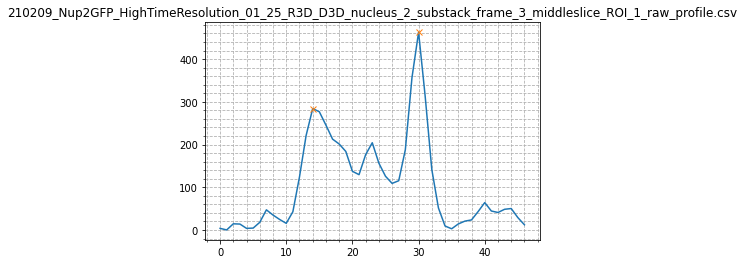

Number of Peaks: 2
[15 34]
NEs: [15 34]
Peak Dist.: 19
Nuc Mid:  24
NucStart:  19 NucEnd:  30
NucInt Point:  190.305
NucInt padded:  185


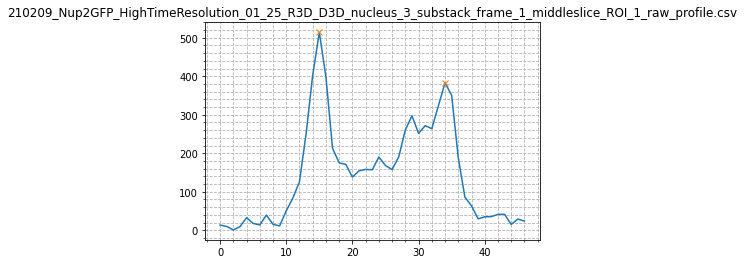

Number of Peaks: 2
[14 32]
NEs: [14 32]
Peak Dist.: 18
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  298.462
NucInt padded:  301


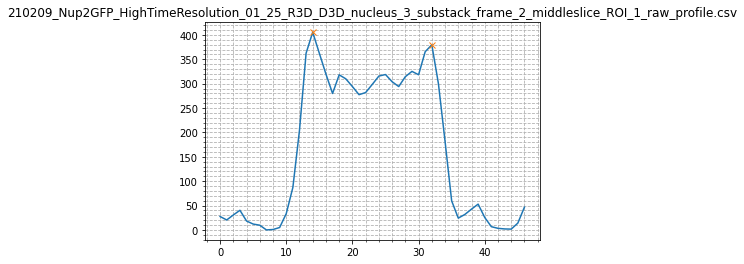

Number of Peaks: 2
[14 31]
NEs: [14 31]
Peak Dist.: 17
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  110.412
NucInt padded:  135


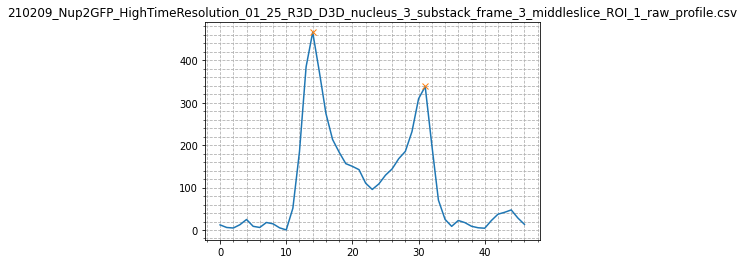

Number of Peaks: 3
[15 26 32]


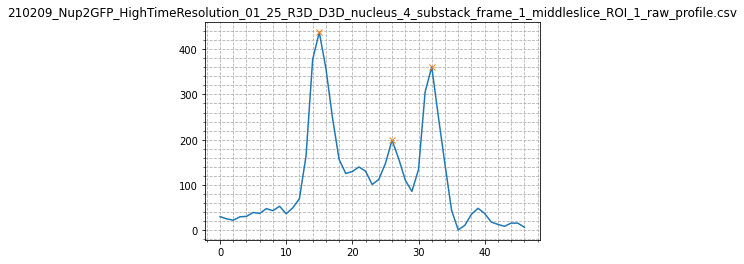

Choose NE1 Peak X position15
Choose NE2 Peak X position32
NEs: [15 32]
Peak Dist.: 17
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  101.027
NucInt padded:  135.55700000000002


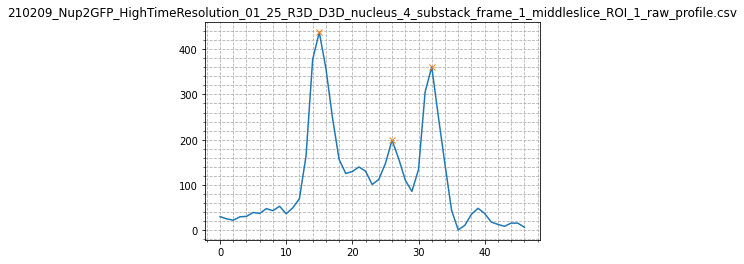

Number of Peaks: 2
[19 29]
NEs: [19 29]
Peak Dist.: 10
Nuc Mid:  24
NucStart:  21 NucEnd:  27
NucInt Point:  187.76
NucInt padded:  180


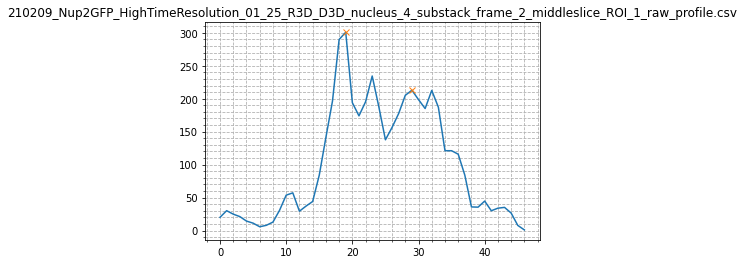

Number of Peaks: 2
[17 30]
NEs: [17 30]
Peak Dist.: 13
Nuc Mid:  23
NucStart:  20 NucEnd:  27
NucInt Point:  178.814
NucInt padded:  170


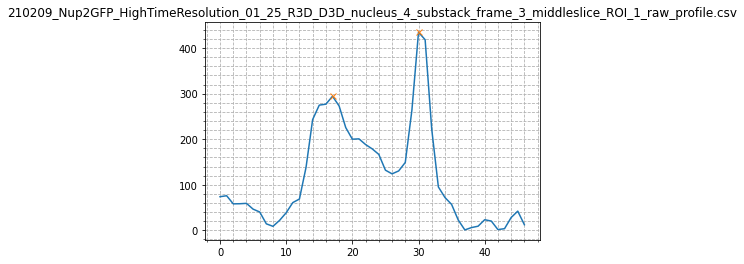

Number of Peaks: 2
[12 34]
NEs: [12 34]
Peak Dist.: 22
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  95.886
NucInt padded:  125


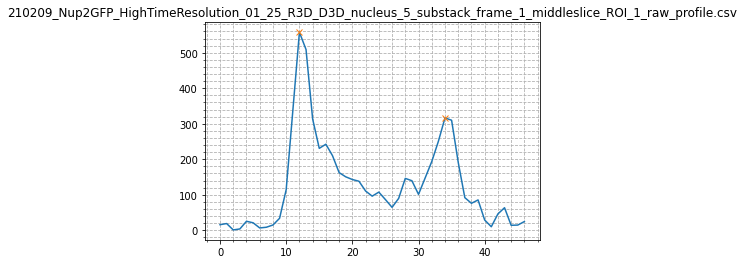

Number of Peaks: 2
[14 28]
NEs: [14 28]
Peak Dist.: 14
Nuc Mid:  21
NucStart:  17 NucEnd:  25
NucInt Point:  238.063
NucInt padded:  201


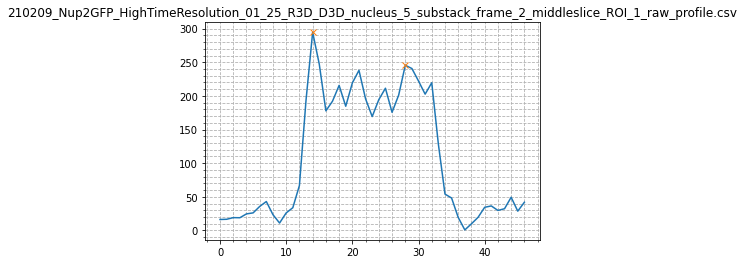

Number of Peaks: 2
[13 33]
NEs: [13 33]
Peak Dist.: 20
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  187.066
NucInt padded:  150


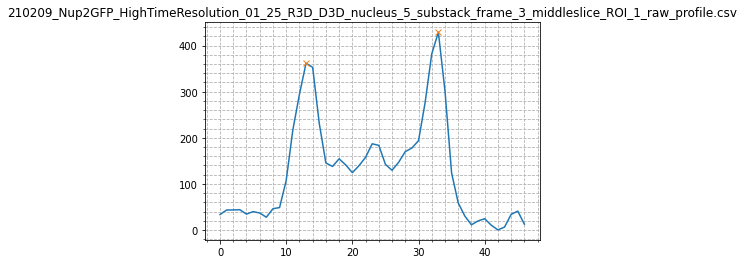

Number of Peaks: 2
[14 34]
NEs: [14 34]
Peak Dist.: 20
Nuc Mid:  24
NucStart:  19 NucEnd:  29
NucInt Point:  49.852000000000004
NucInt padded:  75


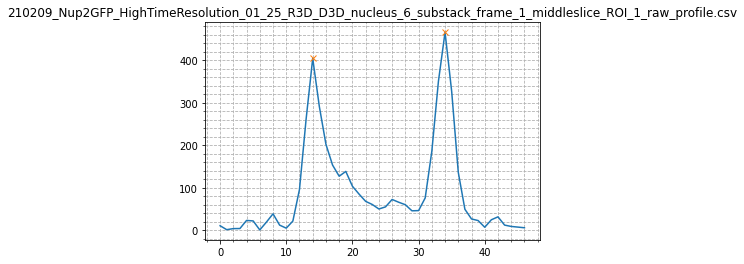

Number of Peaks: 1
[17]


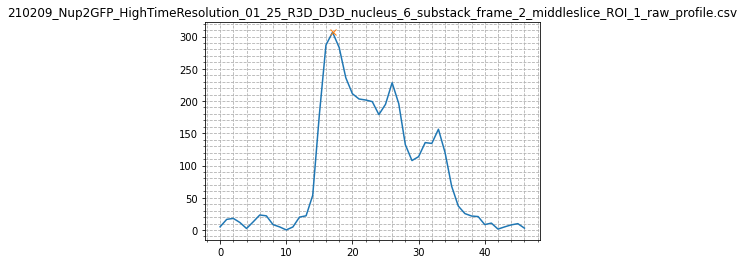

Choose NE1 Peak X position17
Choose NE2 Peak X position33
NEs: [17 33]
Peak Dist.: 16
Nuc Mid:  25
NucStart:  21 NucEnd:  29
NucInt Point:  194.844
NucInt padded:  191.7705


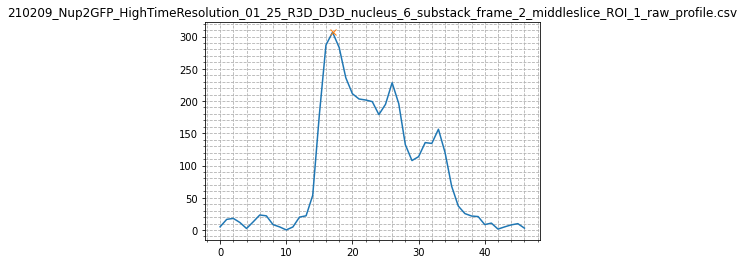

Number of Peaks: 2
[14 29]
NEs: [14 29]
Peak Dist.: 15
Nuc Mid:  21
NucStart:  17 NucEnd:  26
NucInt Point:  174.198
NucInt padded:  136


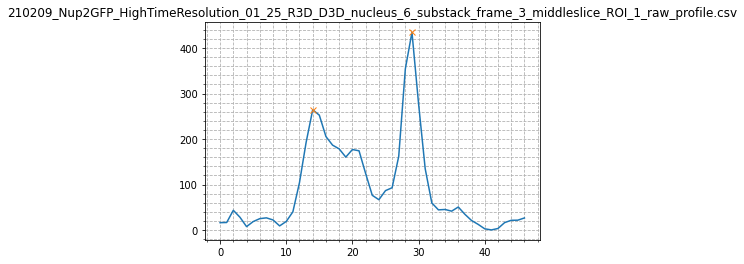

Number of Peaks: 2
[11 33]
NEs: [11 33]
Peak Dist.: 22
Nuc Mid:  22
NucStart:  16 NucEnd:  28
NucInt Point:  104.165
NucInt padded:  81


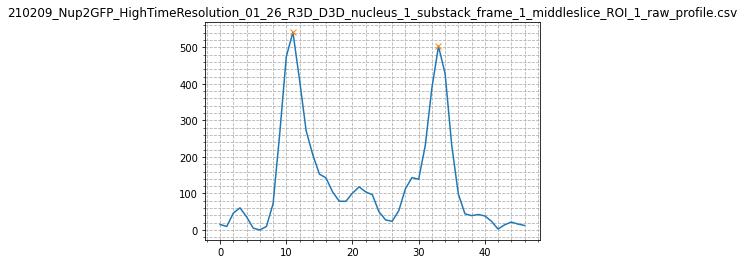

Number of Peaks: 1
[28]


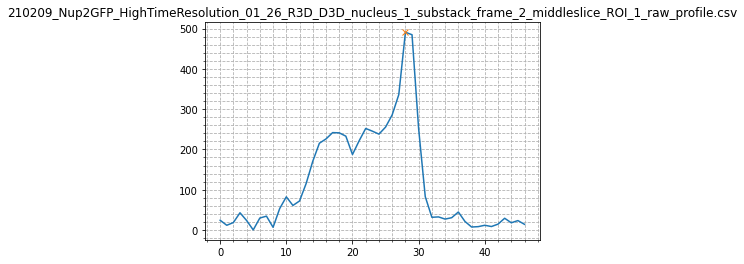

Choose NE1 Peak X position16
Choose NE2 Peak X position28
NEs: [16 28]
Peak Dist.: 12
Nuc Mid:  22
NucStart:  19 NucEnd:  25
NucInt Point:  251.98000000000002
NucInt padded:  229.3936666666667


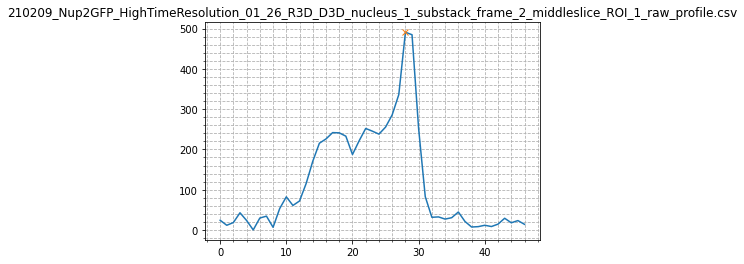

Number of Peaks: 3
[14 27 32]


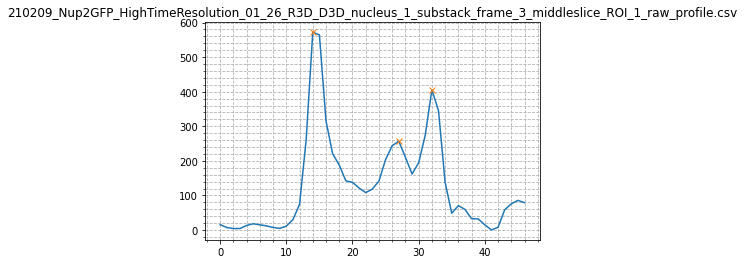

Choose NE1 Peak X position14
Choose NE2 Peak X position32
NEs: [14 32]
Peak Dist.: 18
Nuc Mid:  23
NucStart:  18 NucEnd:  27
NucInt Point:  118.25200000000001
NucInt padded:  156.07455555555555


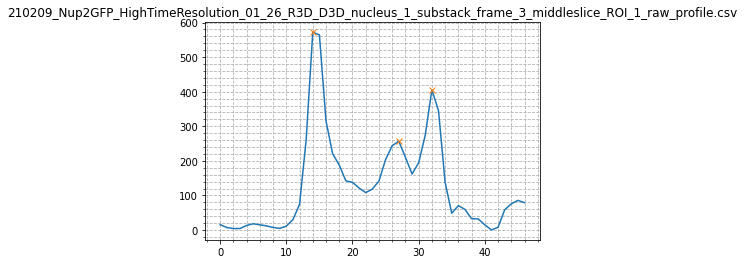

Number of Peaks: 2
[12 34]
NEs: [12 34]
Peak Dist.: 22
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  54.145
NucInt padded:  116


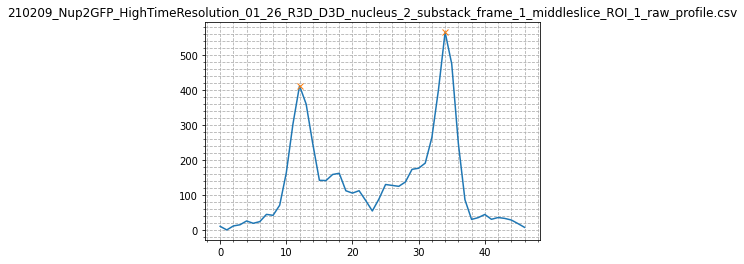

Number of Peaks: 3
[14 25 33]


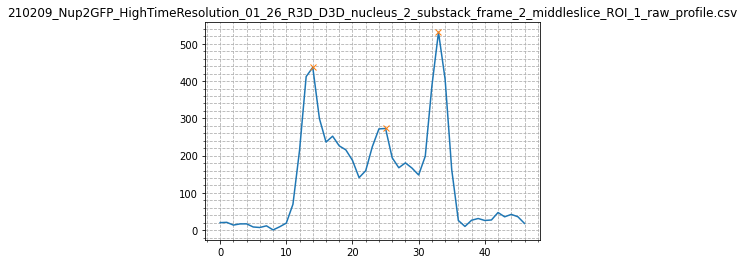

Choose NE1 Peak X position14
Choose NE2 Peak X position33
NEs: [14 33]
Peak Dist.: 19
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  223.884
NucInt padded:  205.89629999999997


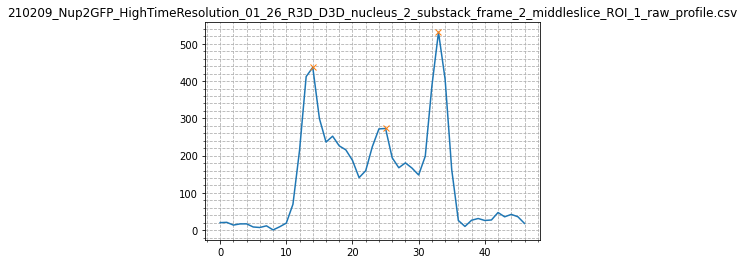

Number of Peaks: 2
[15 30]
NEs: [15 30]
Peak Dist.: 15
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  119.263
NucInt padded:  184


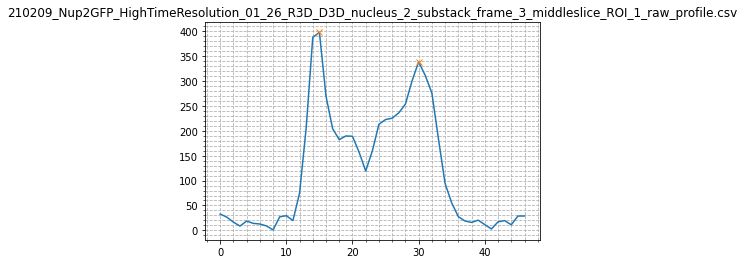

Number of Peaks: 3
[11 18 36]


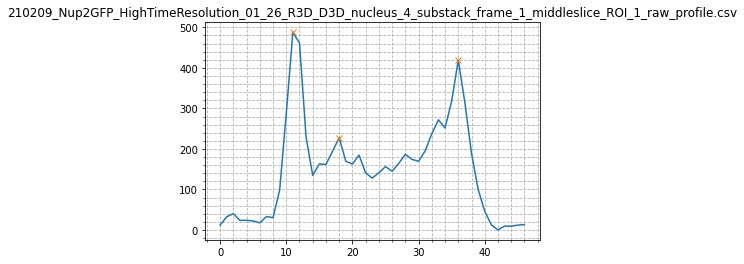

Choose NE1 Peak X position11
Choose NE2 Peak X position36
NEs: [11 36]
Peak Dist.: 25
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  127.928
NucInt padded:  166.80733333333333


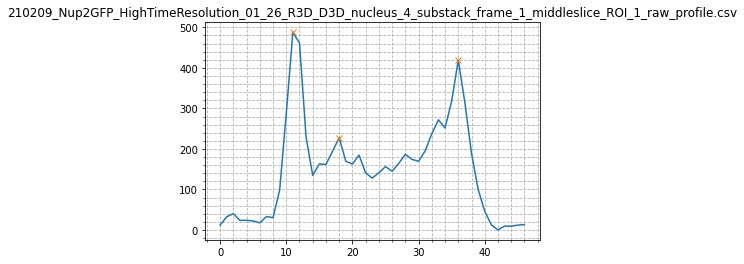

Number of Peaks: 3
[15 26 31]


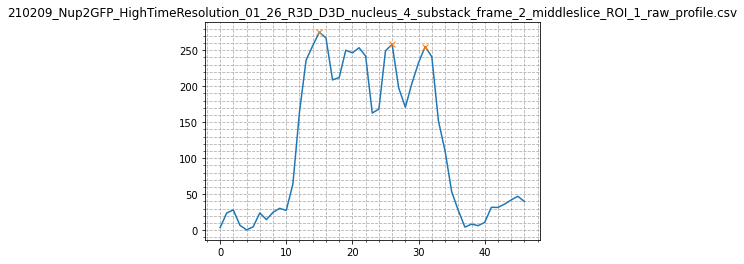

Choose NE1 Peak X position15
Choose NE2 Peak X position31
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  162.642
NucInt padded:  228.640375


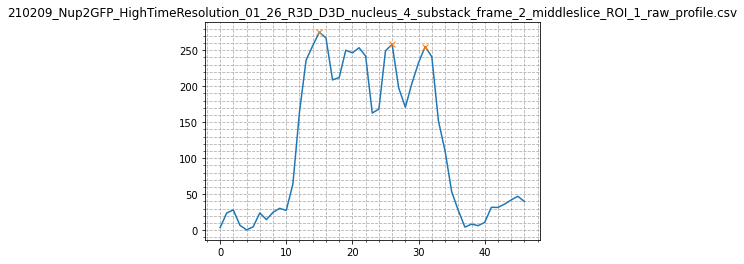

Number of Peaks: 2
[16 32]
NEs: [16 32]
Peak Dist.: 16
Nuc Mid:  24
NucStart:  20 NucEnd:  28
NucInt Point:  138.432
NucInt padded:  170


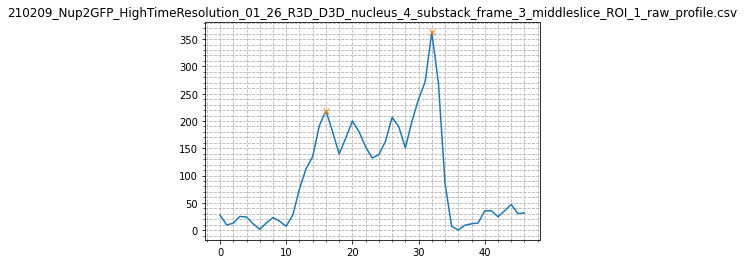

Number of Peaks: 2
[12 33]
NEs: [12 33]
Peak Dist.: 21
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  90.894
NucInt padded:  119


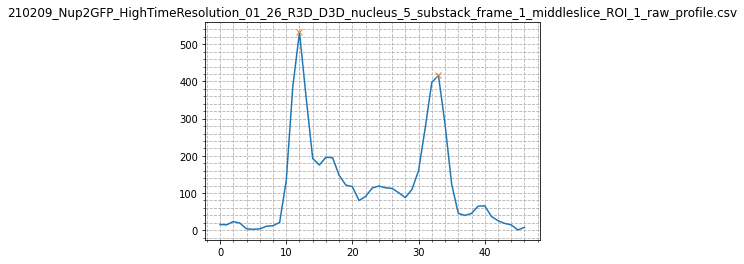

Number of Peaks: 1
[29]


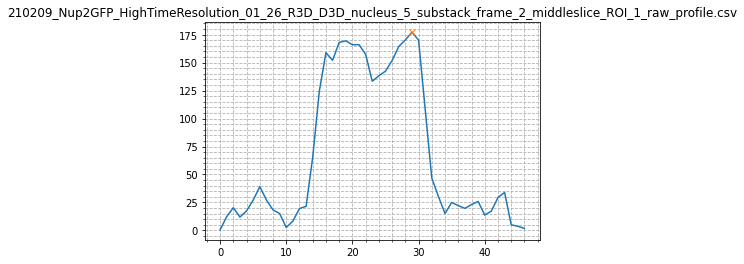

Choose NE1 Peak X position16
Choose NE2 Peak X position29
NEs: [16 29]
Peak Dist.: 13
Nuc Mid:  22
NucStart:  19 NucEnd:  25
NucInt Point:  157.384
NucInt padded:  155.09366666666668


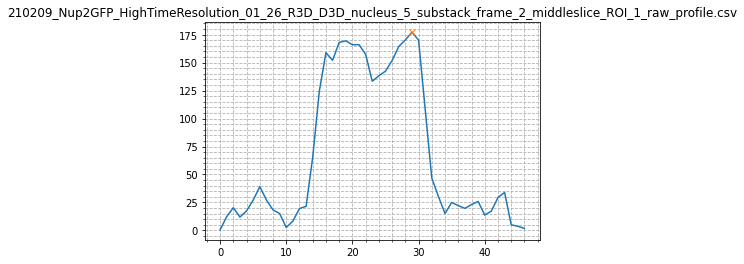

Number of Peaks: 2
[15 30]
NEs: [15 30]
Peak Dist.: 15
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  164.711
NucInt padded:  128


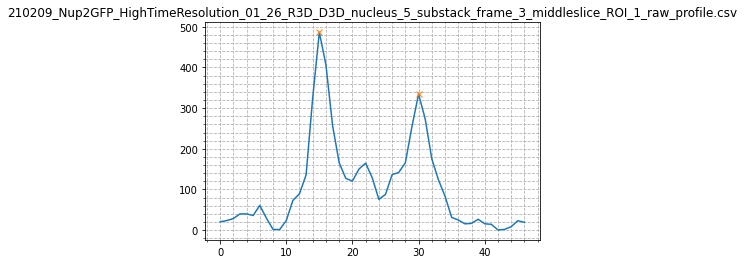

Number of Peaks: 2
[10 33]
NEs: [10 33]
Peak Dist.: 23
Nuc Mid:  21
NucStart:  15 NucEnd:  28
NucInt Point:  75.056
NucInt padded:  119


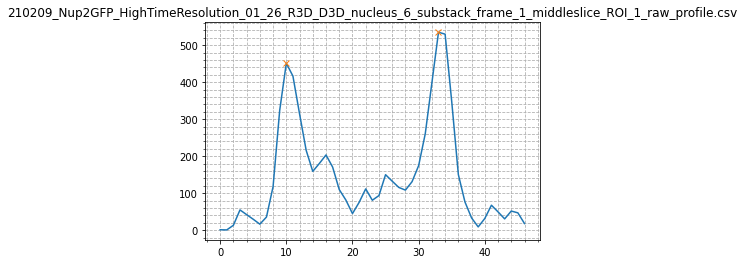

Number of Peaks: 1
[14]


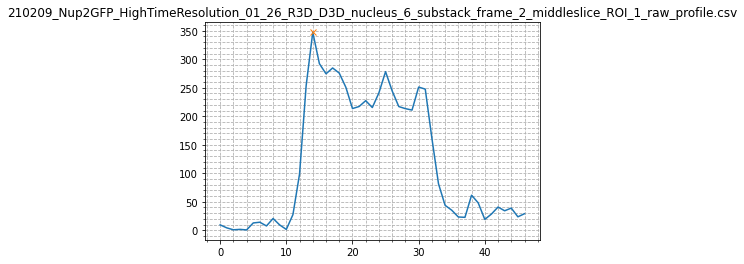

Choose NE1 Peak X position14
Choose NE2 Peak X position30
NEs: [14 30]
Peak Dist.: 16
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  227.288
NucInt padded:  239.857375


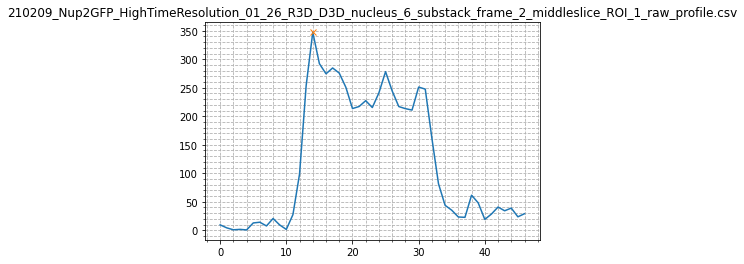

Number of Peaks: 2
[16 28]
NEs: [16 28]
Peak Dist.: 12
Nuc Mid:  22
NucStart:  19 NucEnd:  25
NucInt Point:  127.31
NucInt padded:  177


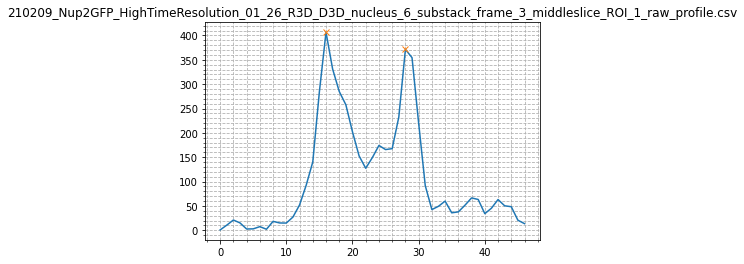

Number of Peaks: 2
[12 33]
NEs: [12 33]
Peak Dist.: 21
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  146.099
NucInt padded:  176


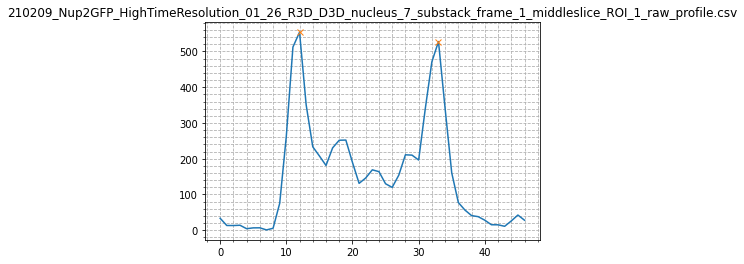

Number of Peaks: 1
[15]


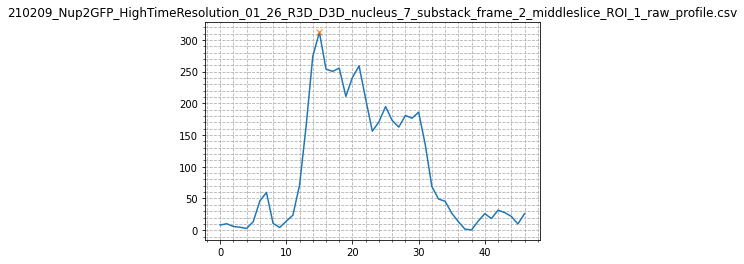

Choose NE1 Peak X position15
Choose NE2 Peak X position30
NEs: [15 30]
Peak Dist.: 15
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  206.595
NucInt padded:  211.890625


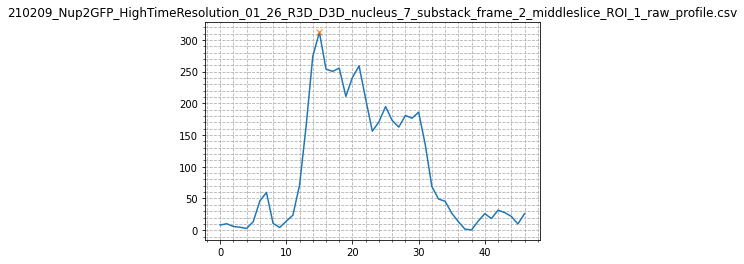

Number of Peaks: 3
[12 22 33]


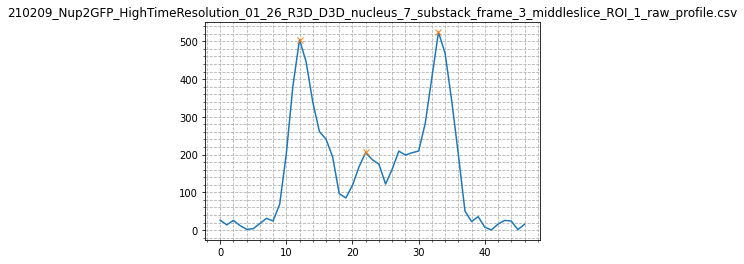

Choose NE1 Peak X position12
Choose NE2 Peak X position33
NEs: [12 33]
Peak Dist.: 21
Nuc Mid:  22
NucStart:  17 NucEnd:  27
NucInt Point:  205.662
NucInt padded:  151.159


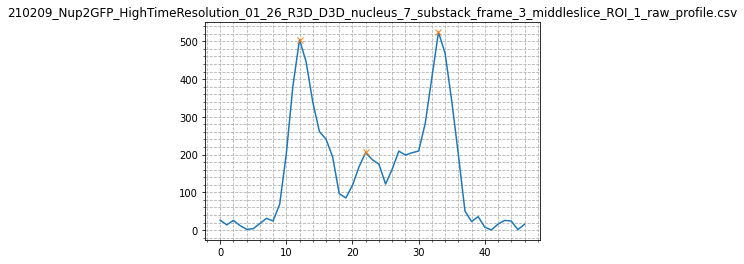

Number of Peaks: 2
[11 35]
NEs: [11 35]
Peak Dist.: 24
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  83.883
NucInt padded:  118


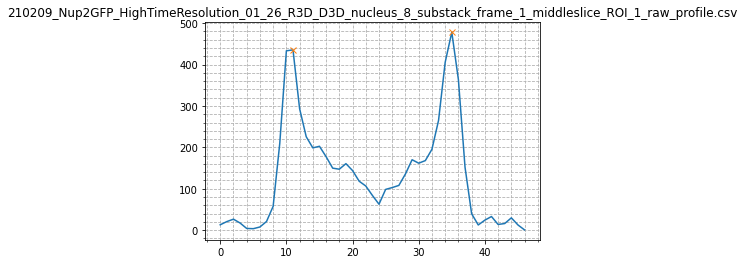

Number of Peaks: 2
[13 27]
NEs: [13 27]
Peak Dist.: 14
Nuc Mid:  20
NucStart:  16 NucEnd:  24
NucInt Point:  237.812
NucInt padded:  227


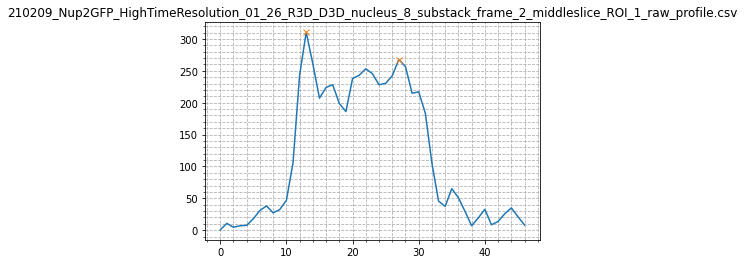

Number of Peaks: 2
[13 32]
NEs: [13 32]
Peak Dist.: 19
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  169.857
NucInt padded:  135


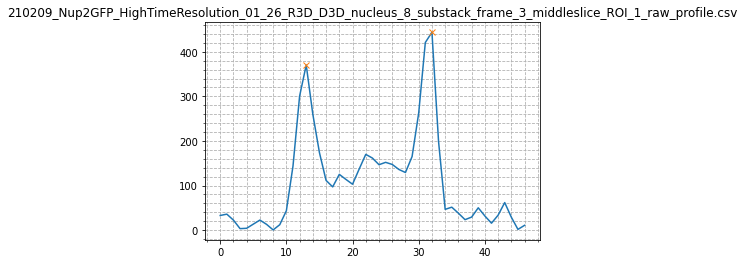

Number of Peaks: 3
[12 26 31]


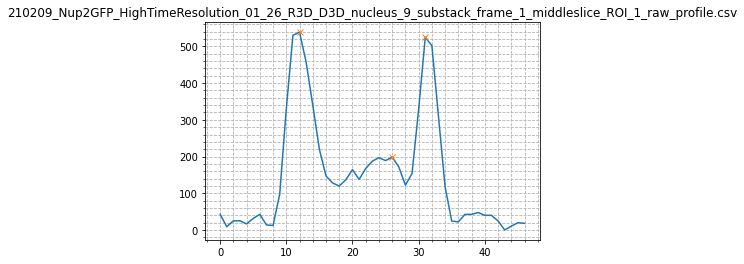

Choose NE1 Peak X position12
Choose NE2 Peak X position31
NEs: [12 31]
Peak Dist.: 19
Nuc Mid:  21
NucStart:  16 NucEnd:  26
NucInt Point:  137.98
NucInt padded:  157.5595


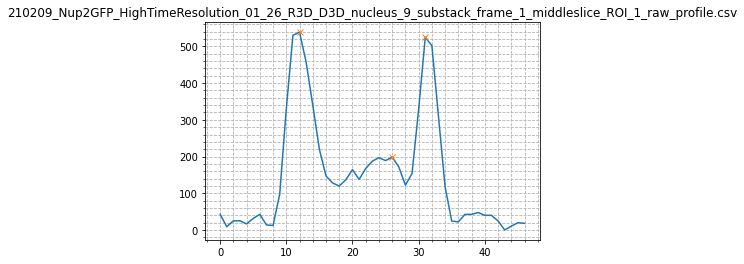

Number of Peaks: 2
[17 32]
NEs: [17 32]
Peak Dist.: 15
Nuc Mid:  24
NucStart:  20 NucEnd:  29
NucInt Point:  237.797
NucInt padded:  244


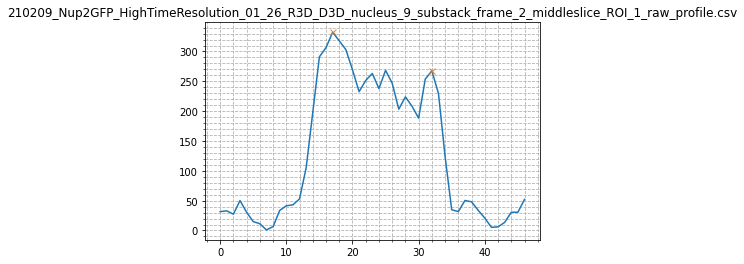

Number of Peaks: 3
[14 23 30]


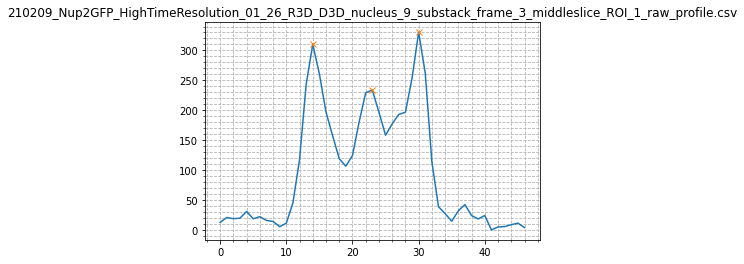

Choose NE1 Peak X position14
Choose NE2 Peak X position30
NEs: [14 30]
Peak Dist.: 16
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  229.377
NucInt padded:  168.69912499999998


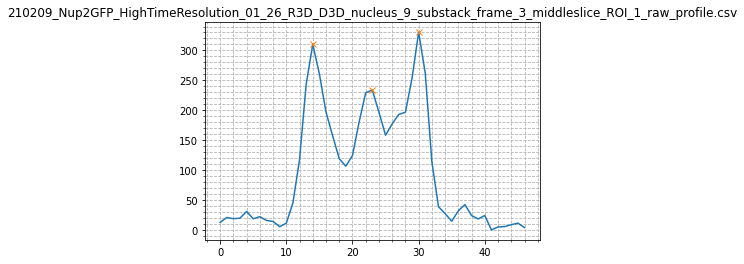

Number of Peaks: 2
[12 34]
NEs: [12 34]
Peak Dist.: 22
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  106.257
NucInt padded:  142


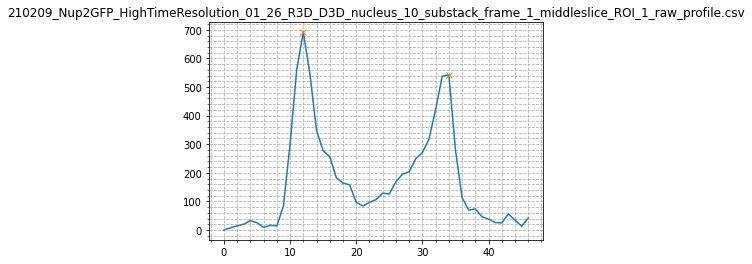

Number of Peaks: 1
[21]


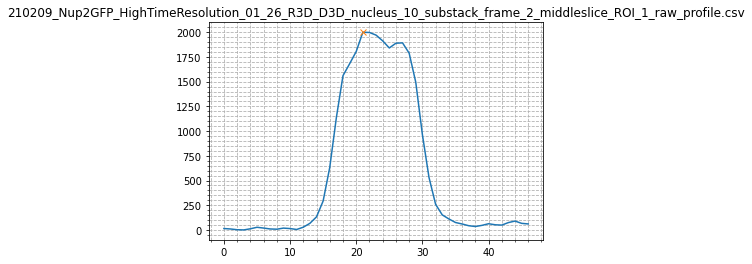

Choose NE1 Peak X position21
Choose NE2 Peak X position28
NEs: [21 28]
Peak Dist.: 7
Nuc Mid:  24
NucStart:  22 NucEnd:  26
NucInt Point:  1912.2
NucInt padded:  1929.86425


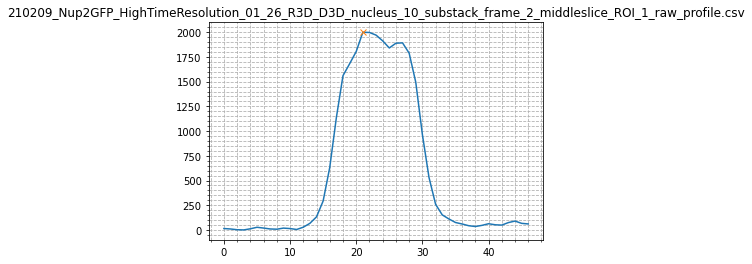

Number of Peaks: 2
[15 29]
NEs: [15 29]
Peak Dist.: 14
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  170.883
NucInt padded:  178


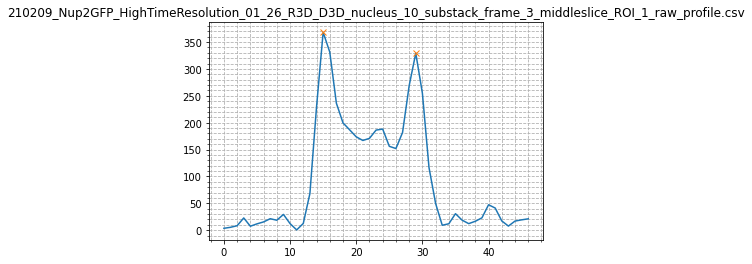

Number of Peaks: 2
[15 35]
NEs: [15 35]
Peak Dist.: 20
Nuc Mid:  25
NucStart:  20 NucEnd:  30
NucInt Point:  129.801
NucInt padded:  137


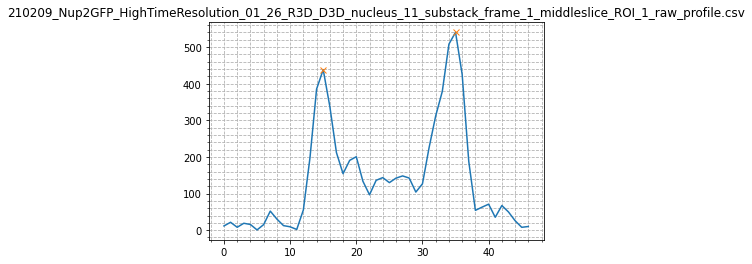

Number of Peaks: 2
[16 30]
NEs: [16 30]
Peak Dist.: 14
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  267.394
NucInt padded:  270


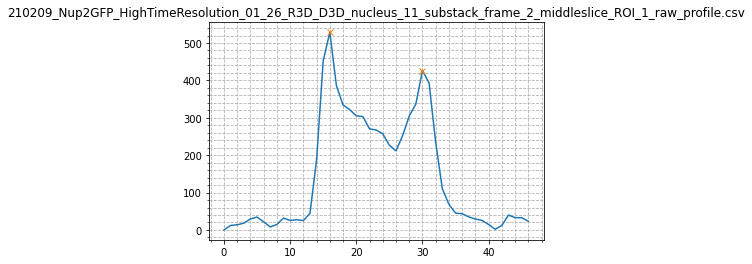

Number of Peaks: 2
[14 32]
NEs: [14 32]
Peak Dist.: 18
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  149.232
NucInt padded:  154


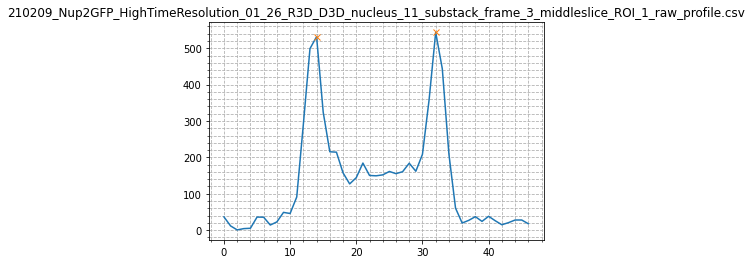

Number of Peaks: 3
[12 21 33]


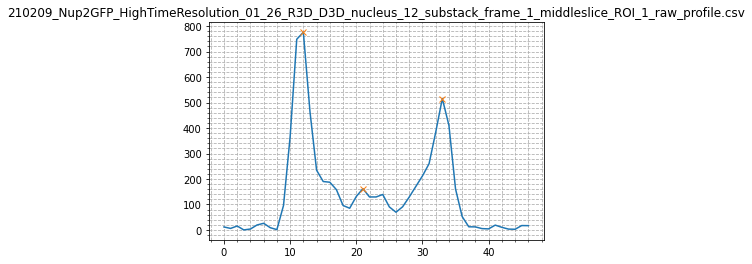

Choose NE1 Peak X position12
Choose NE2 Peak X position33
NEs: [12 33]
Peak Dist.: 21
Nuc Mid:  22
NucStart:  17 NucEnd:  27
NucInt Point:  129.509
NucInt padded:  119.09859999999999


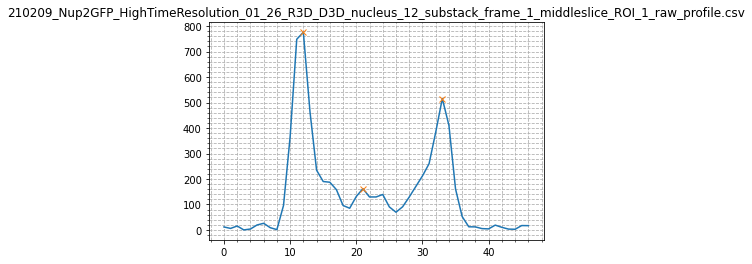

Number of Peaks: 3
[14 26 31]


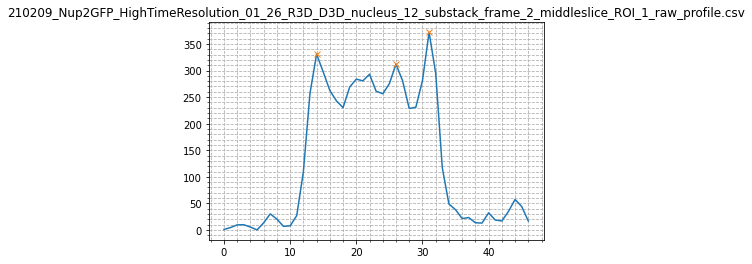

Choose NE1 Peak X position14
Choose NE2 Peak X position31
NEs: [14 31]
Peak Dist.: 17
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  293.062
NucInt padded:  268.595


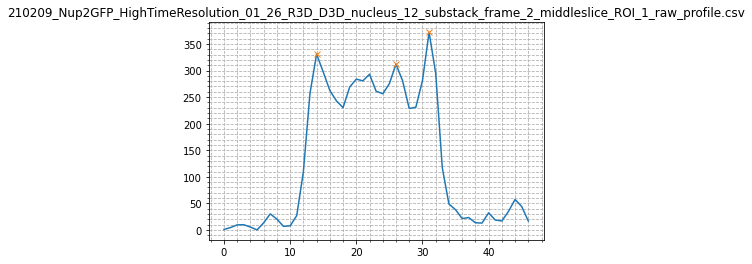

Number of Peaks: 2
[17 32]
NEs: [17 32]
Peak Dist.: 15
Nuc Mid:  24
NucStart:  20 NucEnd:  29
NucInt Point:  144.474
NucInt padded:  170


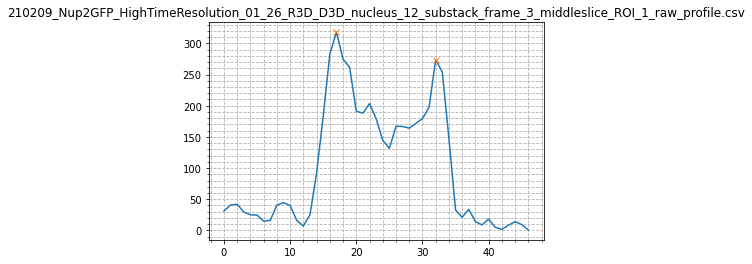

Number of Peaks: 2
[13 32]
NEs: [13 32]
Peak Dist.: 19
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  138.496
NucInt padded:  126


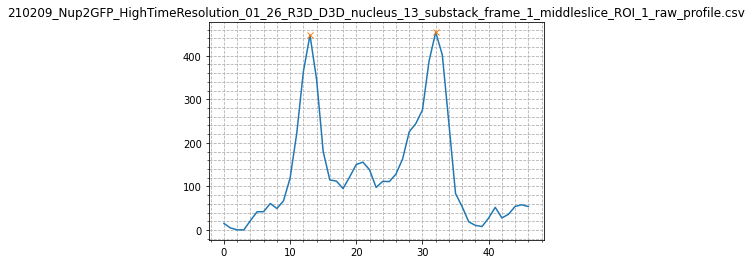

Number of Peaks: 2
[19 30]
NEs: [19 30]
Peak Dist.: 11
Nuc Mid:  24
NucStart:  21 NucEnd:  28
NucInt Point:  247.998
NucInt padded:  209


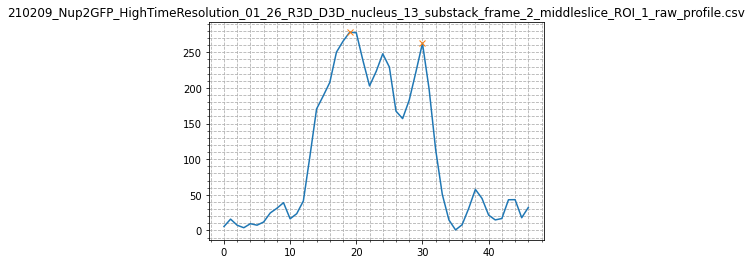

Number of Peaks: 2
[14 30]
NEs: [14 30]
Peak Dist.: 16
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  131.714
NucInt padded:  144


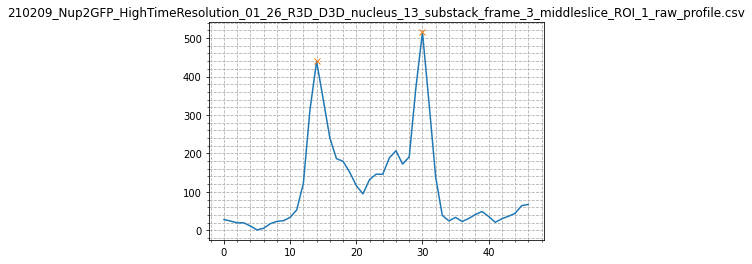

Number of Peaks: 2
[11 34]
NEs: [11 34]
Peak Dist.: 23
Nuc Mid:  22
NucStart:  16 NucEnd:  29
NucInt Point:  139.967
NucInt padded:  127


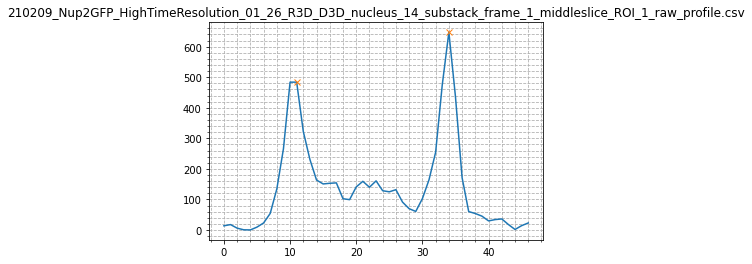

Number of Peaks: 3
[15 21 27]


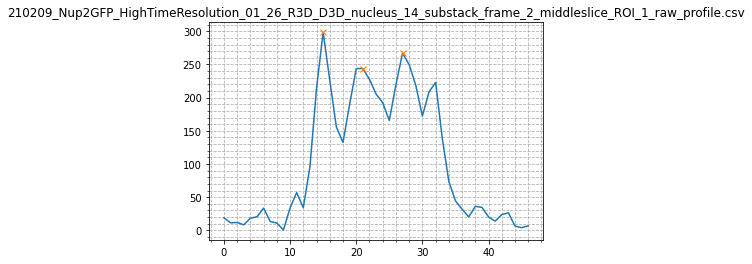

Choose NE1 Peak X position15
Choose NE2 Peak X position32
NEs: [15 32]
Peak Dist.: 17
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  205.361
NucInt padded:  210.90437500000002


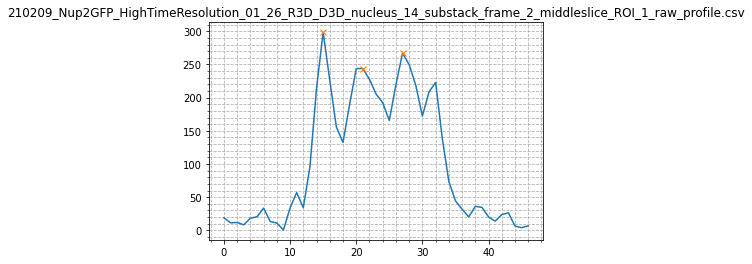

Number of Peaks: 2
[16 32]
NEs: [16 32]
Peak Dist.: 16
Nuc Mid:  24
NucStart:  20 NucEnd:  28
NucInt Point:  109.359
NucInt padded:  119


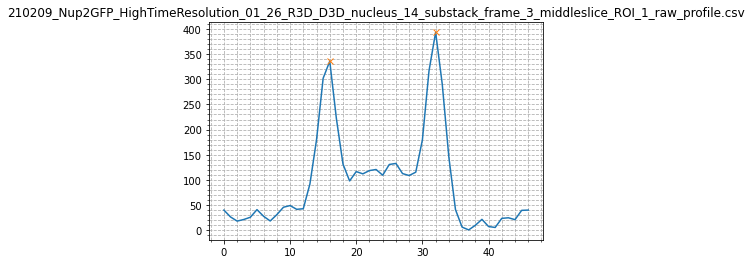

Number of Peaks: 3
[11 23 34]


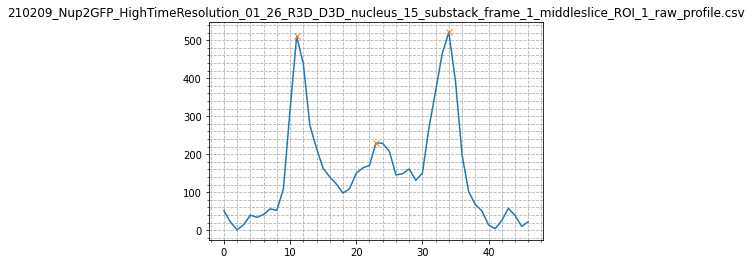

Choose NE1 Peak X position11
Choose NE2 Peak X position34
NEs: [11 34]
Peak Dist.: 23
Nuc Mid:  22
NucStart:  16 NucEnd:  28
NucInt Point:  170.84
NucInt padded:  159.692


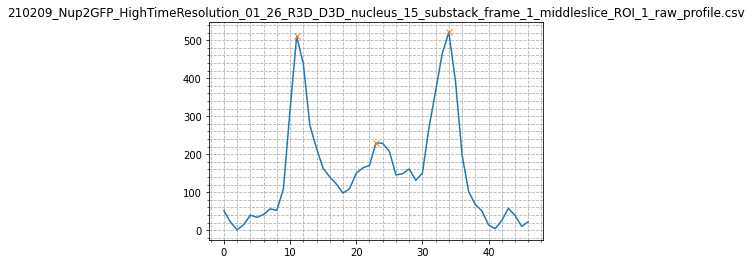

Number of Peaks: 1
[25]


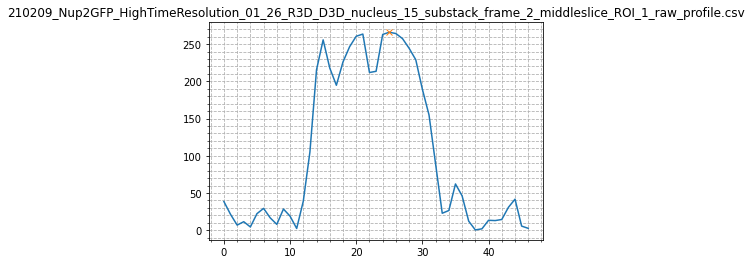

Choose NE1 Peak X position14
Choose NE2 Peak X position26
NEs: [14 26]
Peak Dist.: 12
Nuc Mid:  20
NucStart:  17 NucEnd:  23
NucInt Point:  260.549
NucInt padded:  233.85416666666666


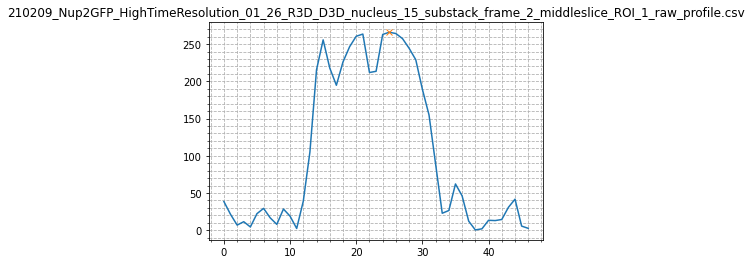

Number of Peaks: 2
[14 31]
NEs: [14 31]
Peak Dist.: 17
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  144.516
NucInt padded:  164


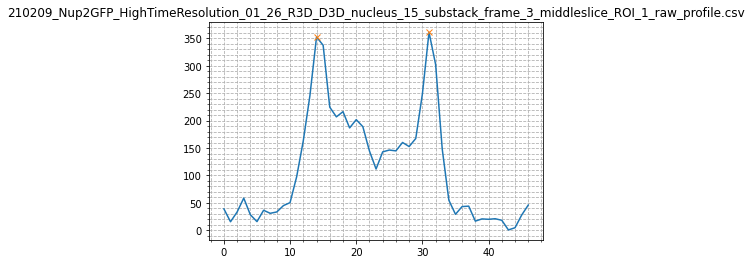

Number of Peaks: 2
[12 35]
NEs: [12 35]
Peak Dist.: 23
Nuc Mid:  23
NucStart:  17 NucEnd:  30
NucInt Point:  152.105
NucInt padded:  146


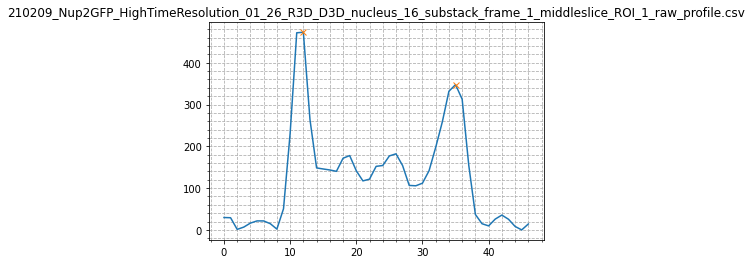

Number of Peaks: 1
[29]


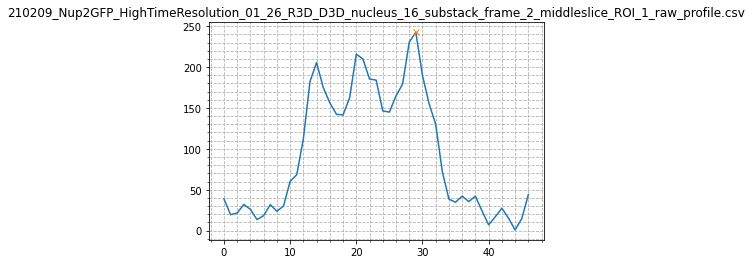

Choose NE1 Peak X position14
Choose NE2 Peak X position29
NEs: [14 29]
Peak Dist.: 15
Nuc Mid:  21
NucStart:  17 NucEnd:  25
NucInt Point:  209.939
NucInt padded:  173.460125


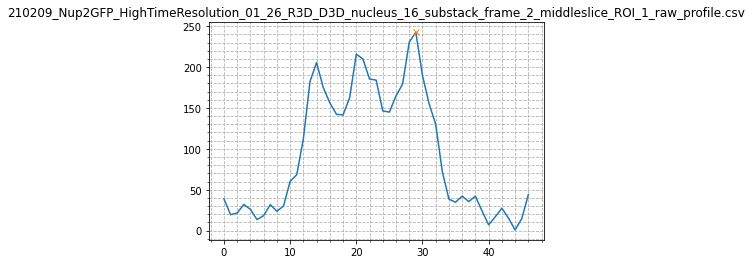

Number of Peaks: 2
[18 31]
NEs: [18 31]
Peak Dist.: 13
Nuc Mid:  24
NucStart:  21 NucEnd:  28
NucInt Point:  170.817
NucInt padded:  173


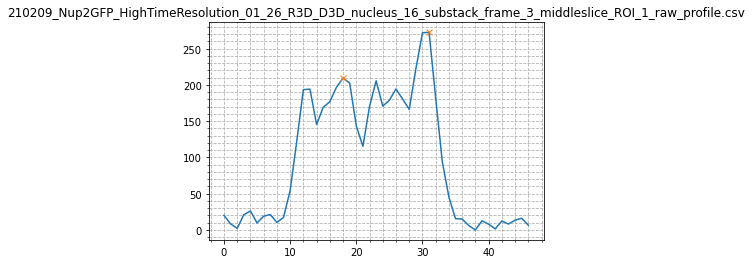

Number of Peaks: 2
[11 33]
NEs: [11 33]
Peak Dist.: 22
Nuc Mid:  22
NucStart:  16 NucEnd:  28
NucInt Point:  139.576
NucInt padded:  154


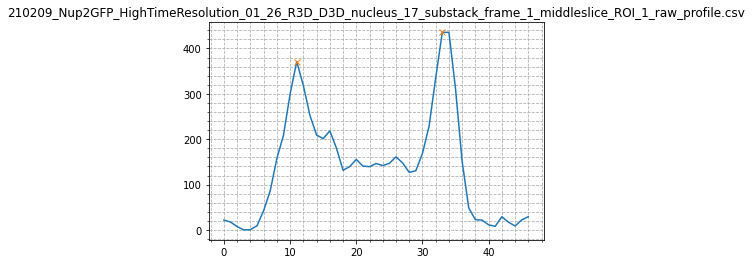

Number of Peaks: 2
[17 31]
NEs: [17 31]
Peak Dist.: 14
Nuc Mid:  24
NucStart:  20 NucEnd:  28
NucInt Point:  244.25599999999997
NucInt padded:  257


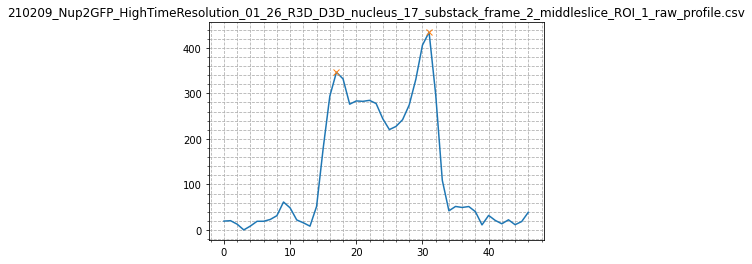

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  162.962
NucInt padded:  167


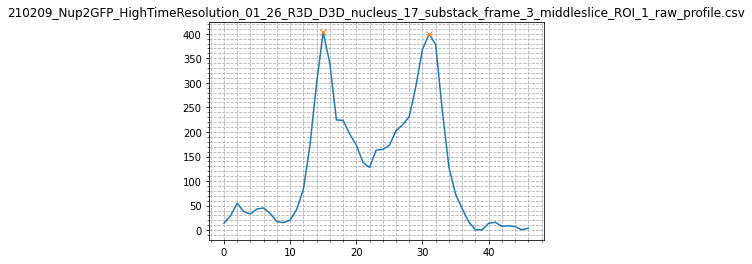

Number of Peaks: 2
[10 33]
NEs: [10 33]
Peak Dist.: 23
Nuc Mid:  21
NucStart:  15 NucEnd:  28
NucInt Point:  107.549
NucInt padded:  142


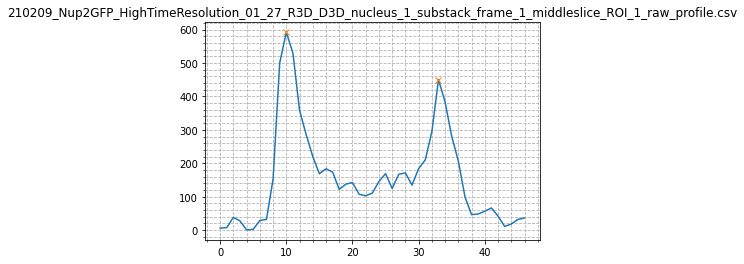

Number of Peaks: 4
[14 21 27 34]


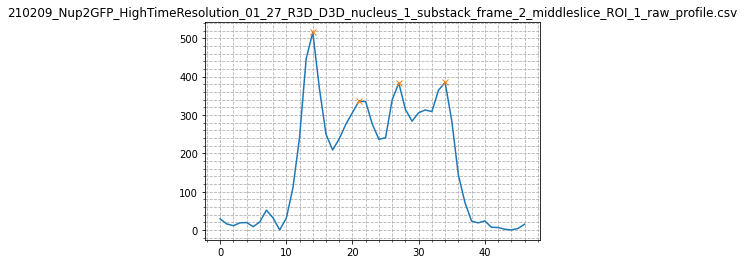

Choose NE1 Peak X position14
Choose NE2 Peak X position34
NEs: [14 34]
Peak Dist.: 20
Nuc Mid:  24
NucStart:  19 NucEnd:  29
NucInt Point:  236.413
NucInt padded:  304.4492


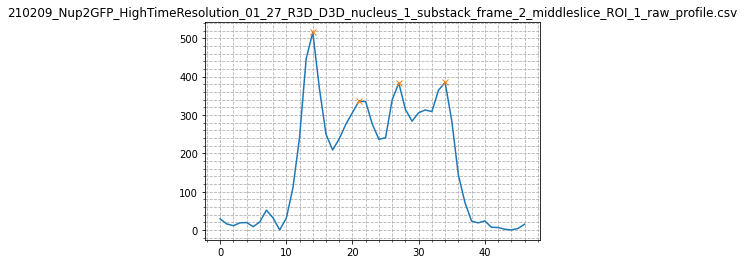

Number of Peaks: 3
[13 21 34]


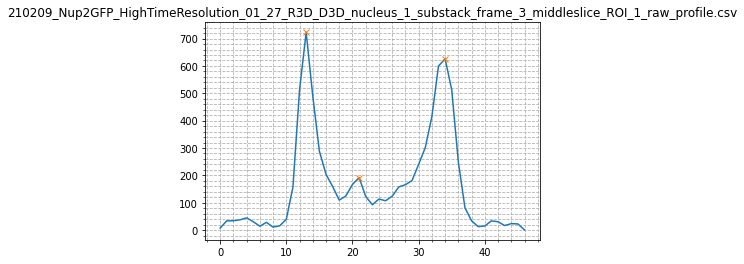

Choose NE1 Peak X position13
Choose NE2 Peak X position34
NEs: [13 34]
Peak Dist.: 21
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  92.758
NucInt padded:  131.18599999999998


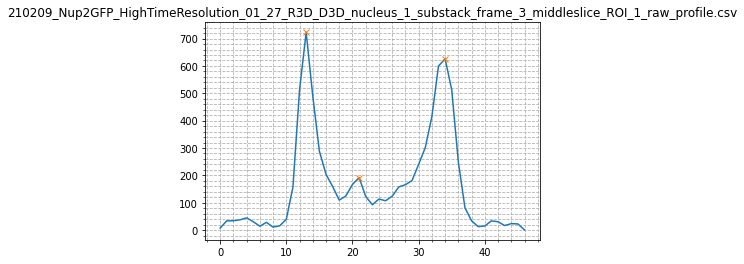

Number of Peaks: 2
[14 33]
NEs: [14 33]
Peak Dist.: 19
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  120.951
NucInt padded:  132


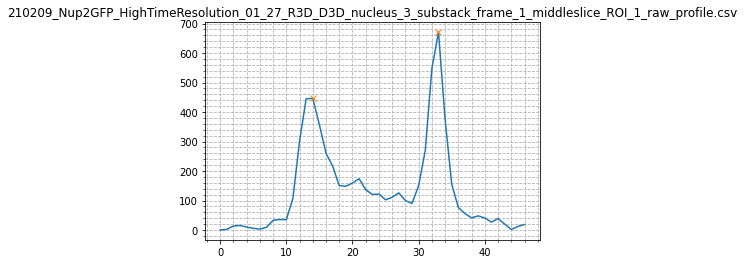

Number of Peaks: 1
[25]


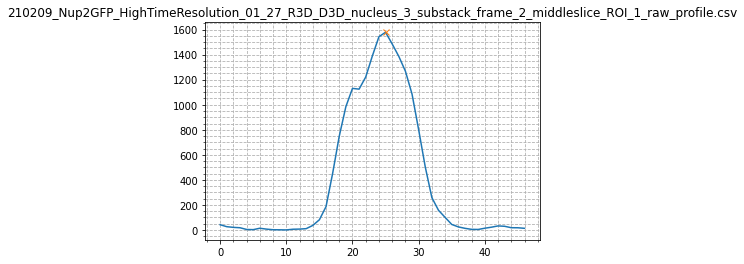

Choose NE1 Peak X position20
Choose NE2 Peak X position28
NEs: [20 28]
Peak Dist.: 8
Nuc Mid:  24
NucStart:  22 NucEnd:  26
NucInt Point:  1542.769
NucInt padded:  1432.6135


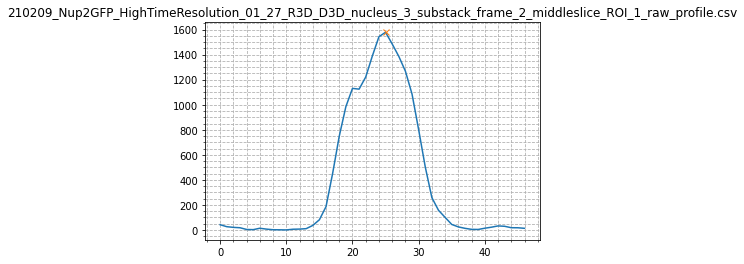

Number of Peaks: 2
[15 30]
NEs: [15 30]
Peak Dist.: 15
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  126.71199999999999
NucInt padded:  146


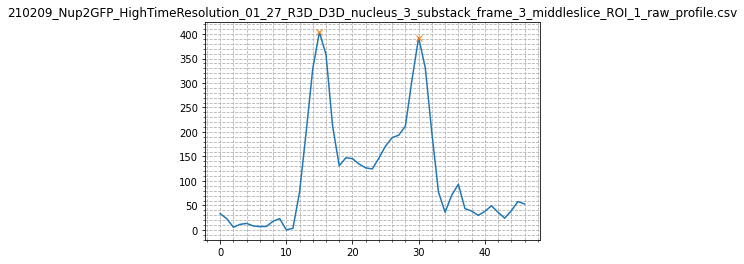

Number of Peaks: 3
[11 21 35]


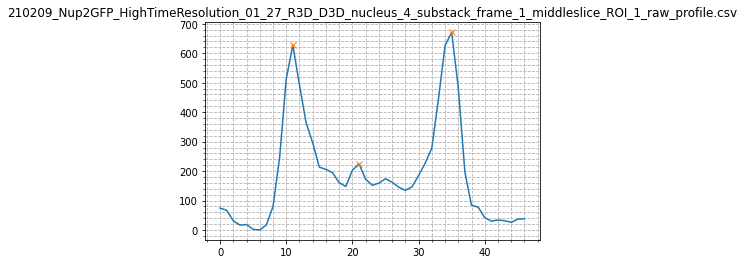

Choose NE1 Peak X position11
Choose NE2 Peak X position35
NEs: [11 35]
Peak Dist.: 24
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  151.76
NucInt padded:  169.15958333333333


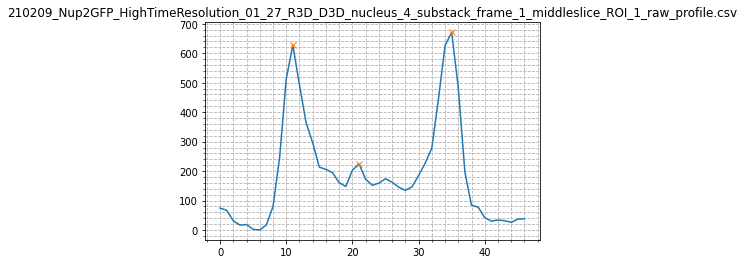

Number of Peaks: 3
[14 26 31]


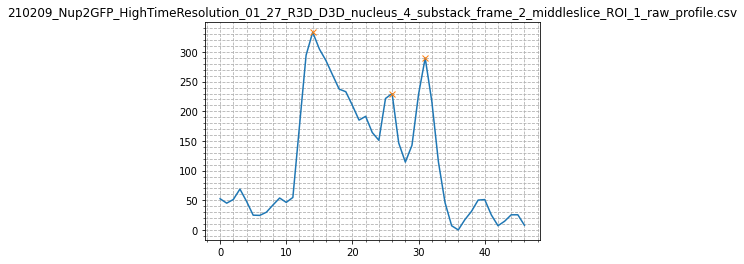

Choose NE1 Peak X position14
Choose NE2 Peak X position31
NEs: [14 31]
Peak Dist.: 17
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  191.555
NucInt padded:  199.26962500000002


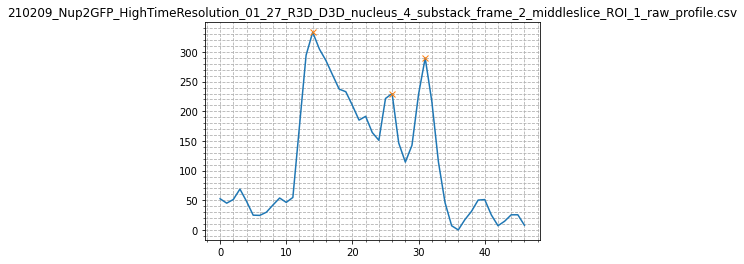

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  85.099
NucInt padded:  90


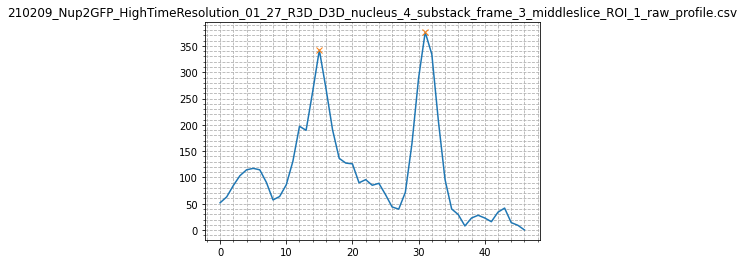

Number of Peaks: 2
[12 33]
NEs: [12 33]
Peak Dist.: 21
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  186.451
NucInt padded:  144


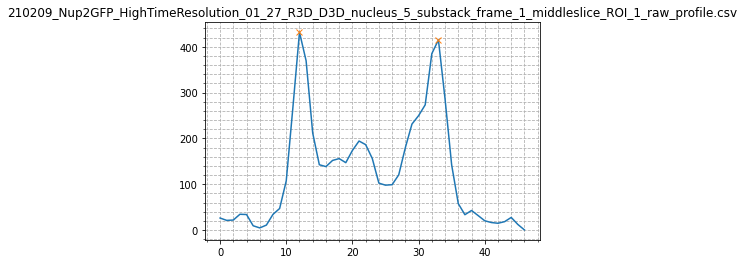

Number of Peaks: 3
[15 25 31]


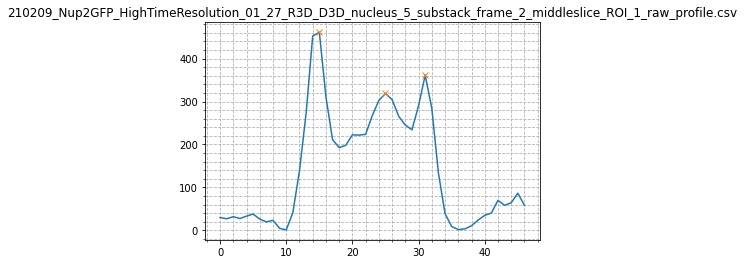

Choose NE1 Peak X position15
Choose NE2 Peak X position31
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  267.109
NucInt padded:  257.3115


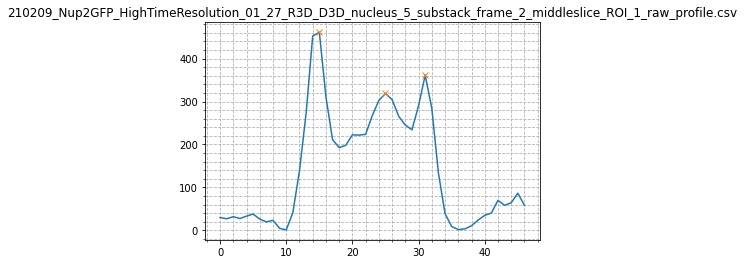

Number of Peaks: 2
[15 32]
NEs: [15 32]
Peak Dist.: 17
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  116.643
NucInt padded:  134


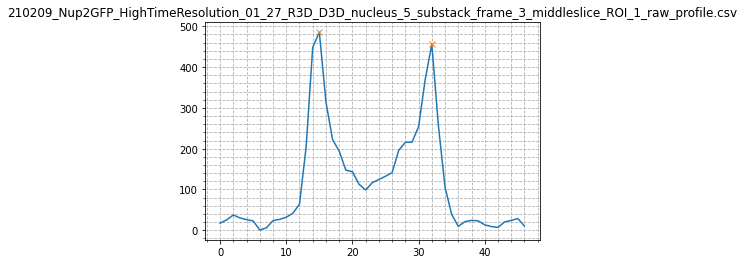

Number of Peaks: 2
[11 33]
NEs: [11 33]
Peak Dist.: 22
Nuc Mid:  22
NucStart:  16 NucEnd:  28
NucInt Point:  91.218
NucInt padded:  101


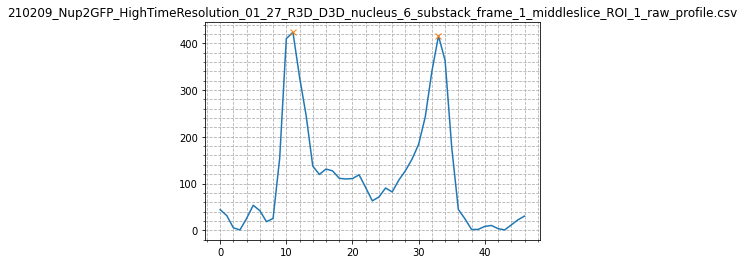

Number of Peaks: 1
[16]


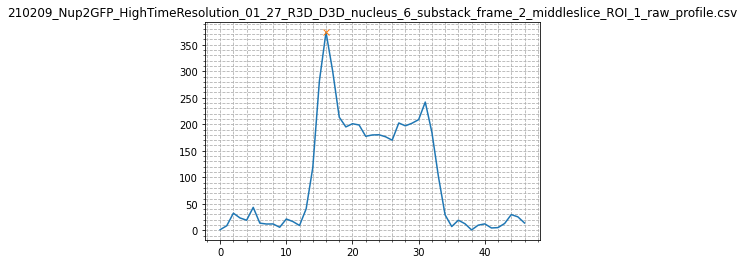

Choose NE1 Peak X position16
Choose NE2 Peak X position31
NEs: [16 31]
Peak Dist.: 15
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  179.872
NucInt padded:  184.829625


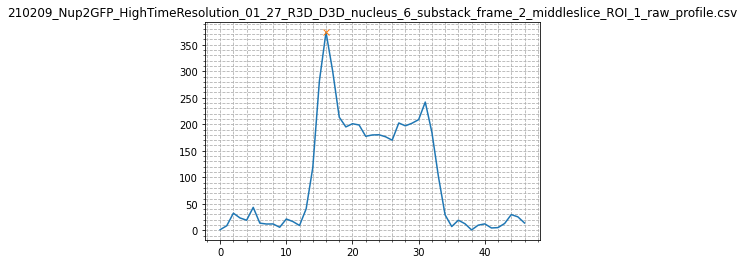

Number of Peaks: 1
[30]


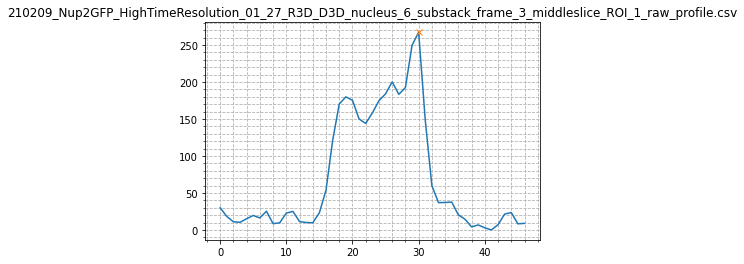

Choose NE1 Peak X position18
Choose NE2 Peak X position30
NEs: [18 30]
Peak Dist.: 12
Nuc Mid:  24
NucStart:  21 NucEnd:  27
NucInt Point:  174.767
NucInt padded:  168.57266666666666


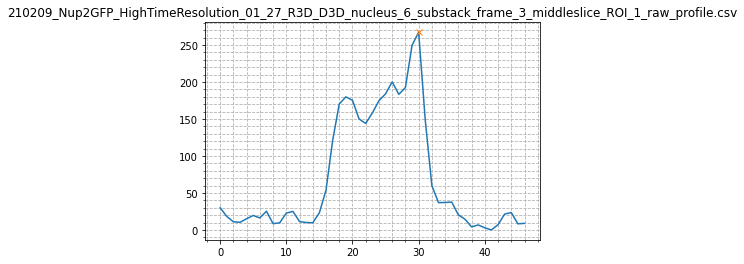

In [26]:
name_list=[]
ne1_list=[]
ne2_list=[]
nuc_list=[]
ratio_list=[]

for f in data:
    name,ne1int,ne2int,nuc,nucRatio = NucRatio(f)
    name_list.append(name)
    ne1_list.append(ne1int)
    ne2_list.append(ne2int)
    nuc_list.append(nuc)
    ratio_list.append(nucRatio)

df = pd.DataFrame({'Image': name_list, 'NE1_int': ne1_list,'NE2_int': ne2_list,'Nuc_int': nuc_list, 'Nuc_Ratio': ratio_list })
df = df[["Image", "NE1_int", "NE2_int", "Nuc_int", "Nuc_Ratio"]]
df.to_csv('NucRatios.csv')

If you are running this notebook in a Google Chrome browser, then the following code will automatically download the output as a CSV to your local computer. This only works within Chrome, so if you aren't using Chrome, you can manually download the output file by clicking the folder icon on the left side of the window. This will open the "Files" browser, and you should see all of the CSV files you uploaded, as well as the "NucRatios.csv" output file. Right click on the ouput file to bring up the options and download to your local computer.

In [27]:
files.download('NucRatios.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

To see a plot of the ratio values calculated we can plot a histogram of the results.

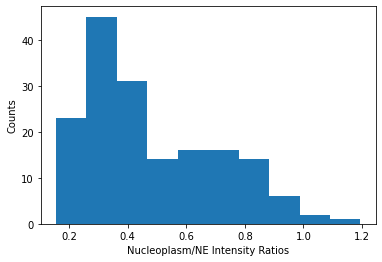

In [28]:
%matplotlib inline

ratios = df.Nuc_Ratio

plt.hist(ratios, density=False, bins=10)
plt.ylabel("Counts") 
plt.xlabel('Nucleoplasm/NE Intensity Ratios');

If you want to reuse this notebook for another data set, strain, experiment etc. then you can click on "Runtime" at the top of the page and click "Factory Reset Runtime". This will keep the Python code notebook but will remove all of the uploaded files and the generated output file. You can then repeat the analysis, this time uploading the new set of CSVs for the next analysis.
